# **LAB 3 - PART 3 Classification**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader as web
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
pd.options.display.float_format = '{:.3f}'.format

C:\Users\Kolawat\AppData\Local\Temp\ipykernel_10344\3738438955.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### **Read csv file**


In [3]:
### START CODE HERE ###
df = pd.read_csv('./Coffee-modified.csv')
### END CODE HERE ###

Select only `['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
         'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']`


In [4]:
### START CODE HERE ###
columns = ['Total.Cup.Points', 'Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
           'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture', 'altitude_mean_meters']

df = df[columns]
### END CODE HERE ###
df

,Total.Cup.Points,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,90.580,Arabica,Ethiopia,Washed / Wet,8.670,8.830,8.670,8.750,8.500,8.420,10.000,0.120,2075.000
1,89.920,Arabica,Ethiopia,Washed / Wet,8.750,8.670,8.500,8.580,8.420,8.420,10.000,0.120,2075.000
2,89.750,Arabica,Guatemala,NaN,8.420,8.500,8.420,8.420,8.330,8.420,10.000,0.000,1700.000
3,89.000,Arabica,Ethiopia,Natural / Dry,8.170,8.580,8.420,8.420,8.500,8.250,10.000,0.110,2000.000
4,88.830,Arabica,Ethiopia,Washed / Wet,8.250,8.500,8.250,8.500,8.420,8.330,10.000,0.120,2075.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,68.330,Arabica,Mexico,Washed / Wet,7.080,6.830,6.250,7.420,7.250,6.750,10.000,0.110,900.000
1307,67.920,Arabica,Haiti,Natural / Dry,6.750,6.580,6.420,6.670,7.080,6.670,9.330,0.140,350.000
1308,63.080,Arabica,Nicaragua,Other,7.250,6.580,6.330,6.250,6.420,6.080,6.000,0.130,1100.000
1309,59.830,Arabica,Guatemala,Washed / Wet,7.500,6.670,6.670,7.670,7.330,6.670,8.000,0.100,1417.320


**Drop NA**


In [5]:
### START CODE HERE ###
df = df.dropna()
### END CODE HERE ###
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1309
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Total.Cup.Points      1003 non-null   float64
 1   Species               1003 non-null   object 
 2   Country.of.Origin     1003 non-null   object 
 3   Processing.Method     1003 non-null   object 
 4   Aroma                 1003 non-null   float64
 5   Flavor                1003 non-null   float64
 6   Aftertaste            1003 non-null   float64
 7   Acidity               1003 non-null   float64
 8   Body                  1003 non-null   float64
 9   Balance               1003 non-null   float64
 10  Uniformity            1003 non-null   float64
 11  Moisture              1003 non-null   float64
 12  altitude_mean_meters  1003 non-null   float64
dtypes: float64(10), object(3)
memory usage: 109.7+ KB


,Total.Cup.Points,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,82.127,7.567,7.514,7.386,7.526,7.504,7.499,9.870,0.095,1816.792
std,2.632,0.301,0.324,0.333,0.308,0.273,0.341,0.445,0.043,9112.473
min,59.830,5.080,6.170,6.170,5.250,6.330,6.080,6.000,0.000,1.000
25%,81.170,7.420,7.330,7.170,7.330,7.330,7.330,10.000,0.100,1100.000
50%,82.420,7.580,7.500,7.420,7.500,7.500,7.500,10.000,0.110,1310.640
75%,83.580,7.750,7.670,7.580,7.670,7.670,7.670,10.000,0.120,1600.000
max,90.580,8.750,8.830,8.670,8.750,8.500,8.580,10.000,0.170,190164.000


Let's `Y` be `Total.Cup.Points` and X be the rest except in `Y`.


In [6]:
### START CODE HERE ###
Y = df[['Total.Cup.Points']]
X = (df.copy()).drop(['Total.Cup.Points'], axis=1)
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- X : `['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture','altitude_mean_meters']`
- Y : `['Total.Cup.Points']`

</details>


In [7]:
print(X.columns)
print(Y.columns)

Index(['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Moisture',
       'altitude_mean_meters'],
      dtype='object')
Index(['Total.Cup.Points'], dtype='object')


**Labeling Bean_grade value using percentile**

- Bean_grade = 1 ; `if Y < rating_pctile[0] 75 percentile`
- Bean_grade = 2 ; `if rating_pctile[0] <= Y < rating_pctile[1] 90 percentile`
- Bean_grade = 3 ; `if Y >= rating_pctile[1]`


In [8]:
# Calculate the percentiles
rating_pctile = Y.quantile([0.75, 0.90]).values

# Label the Bean_grade values
Y['Bean_grade'] = [1 if x < rating_pctile[0] else 2 if x < rating_pctile[1] else 3 for x in Y['Total.Cup.Points']]

# Display the labeled Bean_grade values
Y
Y = Y.drop(['Total.Cup.Points'], axis=1)
Y

C:\Users\Kolawat\AppData\Local\Temp\ipykernel_10344\1701018322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y['Bean_grade'] = [1 if x < rating_pctile[0] else 2 if x < rating_pctile[1] else 3 for x in Y['Total.Cup.Points']]


,Bean_grade
0,3
1,3
3,3
4,3
9,3
...,...
1305,1
1306,1
1307,1
1308,1


**Plot Bar graph that show count of each `Bean_grade`.**

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

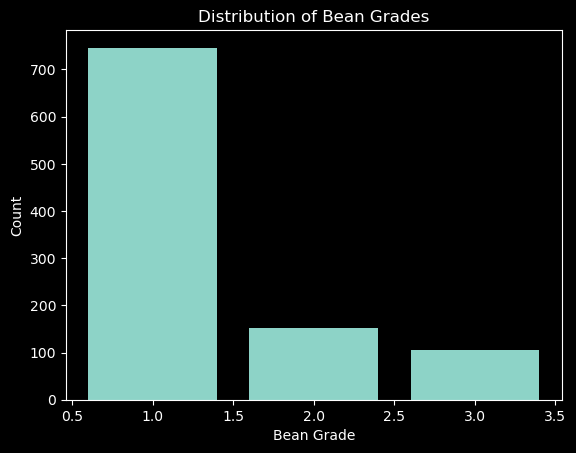

</details>


Bean_grade
1    746
2    152
3    105
Name: count, dtype: int64

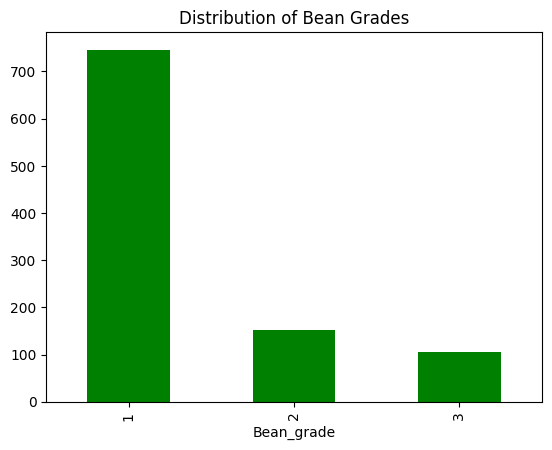

In [9]:
### START CODE HERE ###
Y['Bean_grade'].value_counts().plot(
    kind='bar', title='Distribution of Bean Grades', color='green')
Y['Bean_grade'].value_counts()
### END CODE HERE ###

**Standardize X's numeric data**


In [50]:
### START CODE HERE ###
standard_scaler = preprocessing.StandardScaler()
X_numeric = X.select_dtypes(include='number')
X_scaled = standard_scaler.fit_transform(X_numeric)
X[X_numeric.columns] = X_scaled
### END CODE HERE ###
X

,Species,Country.of.Origin,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters
0,Arabica,Ethiopia,Washed / Wet,3.660,4.058,3.862,3.978,3.651,2.703,0.292,0.576,0.028
1,Arabica,Ethiopia,Washed / Wet,3.926,3.565,3.351,3.425,3.358,2.703,0.292,0.576,0.028
3,Arabica,Ethiopia,Natural / Dry,2.000,3.288,3.110,2.905,3.651,2.204,0.292,0.346,0.020
4,Arabica,Ethiopia,Washed / Wet,2.266,3.041,2.599,3.165,3.358,2.439,0.292,0.576,0.028
9,Arabica,Ethiopia,Natural / Dry,1.702,3.288,3.351,3.165,0.608,2.703,0.292,0.115,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,Arabica,Honduras,Washed / Wet,-1.884,-3.650,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040
1306,Arabica,Mexico,Washed / Wet,-1.618,-2.108,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101
1307,Arabica,Haiti,Natural / Dry,-2.714,-2.879,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161
1308,Arabica,Nicaragua,Other,-1.054,-2.879,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079


**Drop the columns that have correlation more than 0.8.**


In [51]:
### START CODE HERE ###
X_numeric = X.select_dtypes(include='number')

corr_matrix = X_numeric.corr()

dropped_columns = []

for column in corr_matrix.columns:
    correlated_features = corr_matrix.index[corr_matrix[column] > 0.8]
    for correlated_feature in correlated_features:
        if column != correlated_feature and correlated_feature not in dropped_columns:
            dropped_columns.append(correlated_feature)
# X = X.drop(dropped_columns, axis=1)
dropped_columns
### END CODE HERE ###

['Aftertaste', 'Flavor']

In [67]:

corr_top2 = X_numeric.corr().unstack().sort_values().drop_duplicates()
print(corr_top2)

corr_lowest2 = X_numeric.corr().unstack().sort_values(ascending=False).drop_duplicates()
print(corr_lowest2)


Moisture              Balance                -0.217
Body                  Moisture               -0.201
Moisture              Aftertaste             -0.166
Flavor                Moisture               -0.120
Moisture              Acidity                -0.100
Aroma                 Moisture               -0.078
Aftertaste            altitude_mean_meters   -0.027
Aroma                 altitude_mean_meters   -0.020
Body                  altitude_mean_meters   -0.019
Balance               altitude_mean_meters   -0.017
altitude_mean_meters  Flavor                 -0.013
Uniformity            altitude_mean_meters   -0.012
Moisture              Uniformity             -0.006
altitude_mean_meters  Acidity                 0.003
Moisture              altitude_mean_meters    0.019
Uniformity            Body                    0.133
Aroma                 Uniformity              0.135
Acidity               Uniformity              0.192
Uniformity            Flavor                  0.223
Aftertaste  

**One hot encode non-numeric columns**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `pd.get_dummies()`
</details>


In [52]:
### START CODE HERE ###
X = pd.get_dummies(X, drop_first=True)
### END CODE HERE ###
X

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Moisture,altitude_mean_meters,Country.of.Origin_Burundi,...,Country.of.Origin_Thailand,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Processing.Method_Other,Processing.Method_Pulped natural / honey,Processing.Method_Semi-washed / Semi-pulped,Processing.Method_Washed / Wet
0,3.660,4.058,3.862,3.978,3.651,2.703,0.292,0.576,0.028,False,...,False,False,False,False,False,False,False,False,False,True
1,3.926,3.565,3.351,3.425,3.358,2.703,0.292,0.576,0.028,False,...,False,False,False,False,False,False,False,False,False,True
3,2.000,3.288,3.110,2.905,3.651,2.204,0.292,0.346,0.020,False,...,False,False,False,False,False,False,False,False,False,False
4,2.266,3.041,2.599,3.165,3.358,2.439,0.292,0.576,0.028,False,...,False,False,False,False,False,False,False,False,False,True
9,1.702,3.288,3.351,3.165,0.608,2.703,0.292,0.115,0.001,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,-1.884,-3.650,-3.655,-3.335,-3.059,-3.902,-4.201,0.115,-0.040,False,...,False,False,False,False,False,False,False,False,False,True
1306,-1.618,-2.108,-3.415,-0.345,-0.933,-2.200,0.292,0.346,-0.101,False,...,False,False,False,False,False,False,False,False,False,True
1307,-2.714,-2.879,-2.904,-2.783,-1.556,-2.435,-1.214,1.036,-0.161,False,...,False,False,False,False,False,False,False,False,False,False
1308,-1.054,-2.879,-3.174,-4.148,-3.976,-4.167,-8.694,0.806,-0.079,False,...,False,False,False,False,False,False,True,False,False,False


**Split the training set into 70% for training and the remaining 30% for the test set.**


In [53]:
### START CODE HERE ###
from sklearn.model_selection import train_test_split
train = 0.7
test = 0.3

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=test, random_state=42)

# X_train, X_test = X[:int(len(X)*train)], X[int(len(X)*train):]
# Y_train, Y_test = Y[:int(len(Y)*train)], Y[int(len(Y)*train):]

### START CODE HERE ###

### **Grid Search**

**Initialize models and Search Space**

- `Support Vector Machine`

Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>


In [54]:
### START CODE HERE ###

### END CODE HERE ###

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [65]:
### START CODE HERE ###

kernel = ['linear', 'rbf', 'poly']
C = [0.01, 10, 100]
gamma = [0.01, 0.1, 10]
degree = [2, 3]
params_SVC = dict(kernel=kernel, C=C, gamma=gamma, degree=degree)

grid_result = GridSearchCV(
    estimator=SVC(),
    param_grid=params_SVC,
    cv=4 ,
    verbose=4,
    n_jobs=1,
)

grid_result.fit(X_train, Y_train)
best_params = {
    'kernel': grid_result.best_params_['kernel'],
    'C': grid_result.best_params_['C'],
    'degree': grid_result.best_params_['degree'],
    'gamma': grid_result.best_params_['gamma'],
}
print(best_params)
### END CODE HERE ###

Fitting 4 folds for each of 54 candidates, totalling 216 fits
[CV 1/4] END C=0.01, degree=2, gamma=0.01, kernel=linear;, score=0.818 total time=   0.0s
[CV 2/4] END C=0.01, degree=2, gamma=0.01, kernel=linear;, score=0.795 total time=   0.0s
[CV 3/4] END C=0.01, degree=2, gamma=0.01, kernel=linear;, score=0.817 total time=   0.0s
[CV 4/4] END C=0.01, degree=2, gamma=0.01, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/4] END C=0.01, degree=2, gamma=0.01, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/4] END C=0.01, degree=2, gamma=0.01, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/4] END C=0.01, degree=2, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 4/4] END C=0.01, degree=2, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.739 total time=   0.0s
[CV 2/4] END C=0.01, degree=2, gamma=0.01, kernel=poly;, score=0.733 total time=   0.0s
[CV 3/4] END C=0.01, degree=2, gamma=0.01, kernel=poly

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=0.01, degree=2, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.744 total time=   0.0s
[CV 2/4] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.733 total time=   0.0s
[CV 3/4] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.743 total time=   0.0s
[CV 4/4] END C=0.01, degree=2, gamma=0.1, kernel=poly;, score=0.749 total time=   0.0s
[CV 1/4] END C=0.01, degree=2, gamma=10, kernel=linear;, score=0.818 total time=   0.0s
[CV 2/4] END C=0.01, degree=2, gamma=10, kernel=linear;, score=0.795 total time=   0.0s
[CV 3/4] END C=0.01, degree=2, gamma=10, kernel=linear;, score=0.817 total time=   0.0s
[CV 4/4] END C=0.01, degree=2, gamma=10, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/4] END C=0.01, degree=2, gamma=10, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/4] END C=0.01, degree=2, gamma=10, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/4] END C=0.01, degree=2, gamma=10, ker

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 2/4] END C=0.01, degree=2, gamma=10, kernel=poly;, score=0.898 total time=   0.0s
[CV 3/4] END C=0.01, degree=2, gamma=10, kernel=poly;, score=0.857 total time=   0.0s
[CV 4/4] END C=0.01, degree=2, gamma=10, kernel=poly;, score=0.880 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=0.01, kernel=linear;, score=0.818 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=0.01, kernel=linear;, score=0.795 total time=   0.0s
[CV 3/4] END C=0.01, degree=3, gamma=0.01, kernel=linear;, score=0.817 total time=   0.0s
[CV 4/4] END C=0.01, degree=3, gamma=0.01, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/4] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 4/4] END C=0.01, degree=3, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gam

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 3/4] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 4/4] END C=0.01, degree=3, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.761 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.750 total time=   0.0s
[CV 3/4] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.766 total time=   0.0s
[CV 4/4] END C=0.01, degree=3, gamma=0.1, kernel=poly;, score=0.760 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=10, kernel=linear;, score=0.818 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=10, kernel=linear;, score=0.795 total time=   0.0s
[CV 3/4] END C=0.01, degree=3, gamma=10, kernel=linear;, score=0.817 total time=   0.0s
[CV 4/4] END C=0.01, degree=3, gamma=10, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=10, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=10, ke

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=0.01, degree=3, gamma=10, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=10, kernel=poly;, score=0.886 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=10, kernel=poly;, score=0.909 total time=   0.0s
[CV 3/4] END C=0.01, degree=3, gamma=10, kernel=poly;, score=0.863 total time=   0.0s
[CV 4/4] END C=0.01, degree=3, gamma=10, kernel=poly;, score=0.846 total time=   0.0s
[CV 1/4] END C=10, degree=2, gamma=0.01, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/4] END C=10, degree=2, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=10, degree=2, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=10, degree=2, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/4] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.0s
[CV 2/4] END C=10, degree=2, gamma=0.01, kernel=rbf;, score=0.926 total time=   0.0s
[CV 3/4] END C=10, degree=2, gamma=0.01, kernel=r

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 1/4] END C=10, degree=2, gamma=0.1, kernel=rbf;, score=0.915 total time=   0.0s
[CV 2/4] END C=10, degree=2, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/4] END C=10, degree=2, gamma=0.1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 4/4] END C=10, degree=2, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 1/4] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.881 total time=   0.0s
[CV 2/4] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.892 total time=   0.0s
[CV 3/4] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.869 total time=   0.0s
[CV 4/4] END C=10, degree=2, gamma=0.1, kernel=poly;, score=0.869 total time=   0.0s
[CV 1/4] END C=10, degree=2, gamma=10, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/4] END C=10, degree=2, gamma=10, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=10, degree=2, gamma=10, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=10, degree=2, gamma=10, kernel=linear;, score=0.920

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=10, degree=2, gamma=10, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=10, degree=2, gamma=10, kernel=poly;, score=0.841 total time=   0.0s
[CV 2/4] END C=10, degree=2, gamma=10, kernel=poly;, score=0.858 total time=   0.0s
[CV 3/4] END C=10, degree=2, gamma=10, kernel=poly;, score=0.869 total time=   0.0s
[CV 4/4] END C=10, degree=2, gamma=10, kernel=poly;, score=0.869 total time=   0.0s
[CV 1/4] END C=10, degree=3, gamma=0.01, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/4] END C=10, degree=3, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=10, degree=3, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=10, degree=3, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/4] END C=10, degree=3, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.0s
[CV 2/4] END C=10, degree=3, gamma=0.01, kernel=rbf;, score=0.926 total time=   0.0s
[CV 3/4] END C=10, degree=3, gamma=0.01, kernel=rbf;, score

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 2/4] END C=10, degree=3, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=10, degree=3, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=10, degree=3, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/4] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.915 total time=   0.0s
[CV 2/4] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/4] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.914 total time=   0.0s
[CV 4/4] END C=10, degree=3, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 1/4] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.909 total time=   0.0s
[CV 2/4] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.938 total time=   0.0s
[CV 3/4] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.903 total time=   0.0s
[CV 4/4] END C=10, degree=3, gamma=0.1, kernel=poly;, score=0.874 total time=   0.0s
[CV 1/4] END C=10, degree=3, gamma=10, kernel=linear;, score=0.

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 3/4] END C=10, degree=3, gamma=10, kernel=rbf;, score=0.743 total time=   0.0s
[CV 4/4] END C=10, degree=3, gamma=10, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=10, degree=3, gamma=10, kernel=poly;, score=0.886 total time=   0.0s
[CV 2/4] END C=10, degree=3, gamma=10, kernel=poly;, score=0.909 total time=   0.0s
[CV 3/4] END C=10, degree=3, gamma=10, kernel=poly;, score=0.863 total time=   0.0s
[CV 4/4] END C=10, degree=3, gamma=10, kernel=poly;, score=0.846 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.898 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.938 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=100, degree=2, gamma=0.01, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=0.01, kernel=rbf;, score=0.914 total time=   0.0s
[CV 4/4] END C=100, degree=2, gamma=0.01, kernel=rbf;, score=0.931 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.869 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.881 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.886 total time=   0.0s
[CV 4/4] END C=100, degree=2, gamma=0.01, kernel=poly;, score=0.851 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=0.1, kernel=linear;, score=0.898 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=0.1, kernel=linear;, score=0.938 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=0.1, ke

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=100, degree=2, gamma=0.1, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=0.1, kernel=rbf;, score=0.915 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 4/4] END C=100, degree=2, gamma=0.1, kernel=rbf;, score=0.891 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.881 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.898 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.857 total time=   0.0s
[CV 4/4] END C=100, degree=2, gamma=0.1, kernel=poly;, score=0.880 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=10, kernel=linear;, score=0.898 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=10, kernel=linear;, score=0.938 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=10, kernel=linear;

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=100, degree=2, gamma=10, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=10, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=10, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=10, kernel=rbf;, score=0.743 total time=   0.0s
[CV 4/4] END C=100, degree=2, gamma=10, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=100, degree=2, gamma=10, kernel=poly;, score=0.841 total time=   0.0s
[CV 2/4] END C=100, degree=2, gamma=10, kernel=poly;, score=0.858 total time=   0.0s
[CV 3/4] END C=100, degree=2, gamma=10, kernel=poly;, score=0.869 total time=   0.0s
[CV 4/4] END C=100, degree=2, gamma=10, kernel=poly;, score=0.869 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=0.01, kernel=linear;, score=0.898 total time=   0.0s


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 2/4] END C=100, degree=3, gamma=0.01, kernel=linear;, score=0.938 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=100, degree=3, gamma=0.01, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=0.01, kernel=rbf;, score=0.915 total time=   0.0s
[CV 2/4] END C=100, degree=3, gamma=0.01, kernel=rbf;, score=0.938 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=0.01, kernel=rbf;, score=0.914 total time=   0.0s
[CV 4/4] END C=100, degree=3, gamma=0.01, kernel=rbf;, score=0.931 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.784 total time=   0.0s
[CV 2/4] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.790 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.811 total time=   0.0s
[CV 4/4] END C=100, degree=3, gamma=0.01, kernel=poly;, score=0.800 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=0.1, 

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 2/4] END C=100, degree=3, gamma=0.1, kernel=linear;, score=0.938 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=100, degree=3, gamma=0.1, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=0.1, kernel=rbf;, score=0.915 total time=   0.0s
[CV 2/4] END C=100, degree=3, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=0.1, kernel=rbf;, score=0.926 total time=   0.0s
[CV 4/4] END C=100, degree=3, gamma=0.1, kernel=rbf;, score=0.891 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.898 total time=   0.0s
[CV 2/4] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.920 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.886 total time=   0.0s
[CV 4/4] END C=100, degree=3, gamma=0.1, kernel=poly;, score=0.874 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=10, kernel=linea

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 2/4] END C=100, degree=3, gamma=10, kernel=linear;, score=0.938 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=10, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=100, degree=3, gamma=10, kernel=linear;, score=0.909 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=10, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/4] END C=100, degree=3, gamma=10, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=10, kernel=rbf;, score=0.743 total time=   0.0s


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=100, degree=3, gamma=10, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=100, degree=3, gamma=10, kernel=poly;, score=0.886 total time=   0.0s
[CV 2/4] END C=100, degree=3, gamma=10, kernel=poly;, score=0.909 total time=   0.0s
[CV 3/4] END C=100, degree=3, gamma=10, kernel=poly;, score=0.863 total time=   0.0s
[CV 4/4] END C=100, degree=3, gamma=10, kernel=poly;, score=0.846 total time=   0.0s
{'kernel': 'linear', 'C': 10, 'degree': 2, 'gamma': 0.01}


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, create a function to calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[216   7   1]
 [  9  33   4]
 [  0   6  25]]
   Precision  Recall  F1-Score  Support
0      0.960   0.964     0.962      224
1      0.717   0.717     0.717       46
2      0.833   0.806     0.820       31

Accuracy:  0.9102990033222591
```

</details>


In [56]:
svc_model = SVC(
    kernel=best_params['kernel'],
    C=best_params['C'],
    degree=best_params['degree'],
    gamma=best_params['gamma'],
    
)
svc_model.fit(X_train, Y_train)
predictions = svc_model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, predictions)
class_report = metrics.classification_report(Y_test, predictions)
accuracy = metrics.accuracy_score(Y_test, predictions)

print('Confusion Matrix: \n', confusion_matrix)
print('Classification Report: \n', class_report)
print('Accuracy: ', accuracy)

Confusion Matrix: 
 [[220   6   1]
 [ 10  27   1]
 [  0   8  28]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.96       227
           2       0.66      0.71      0.68        38
           3       0.93      0.78      0.85        36

    accuracy                           0.91       301
   macro avg       0.85      0.82      0.83       301
weighted avg       0.92      0.91      0.91       301

Accuracy:  0.9136212624584718


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Select 4 pairs of features then polt the decision boundary.**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
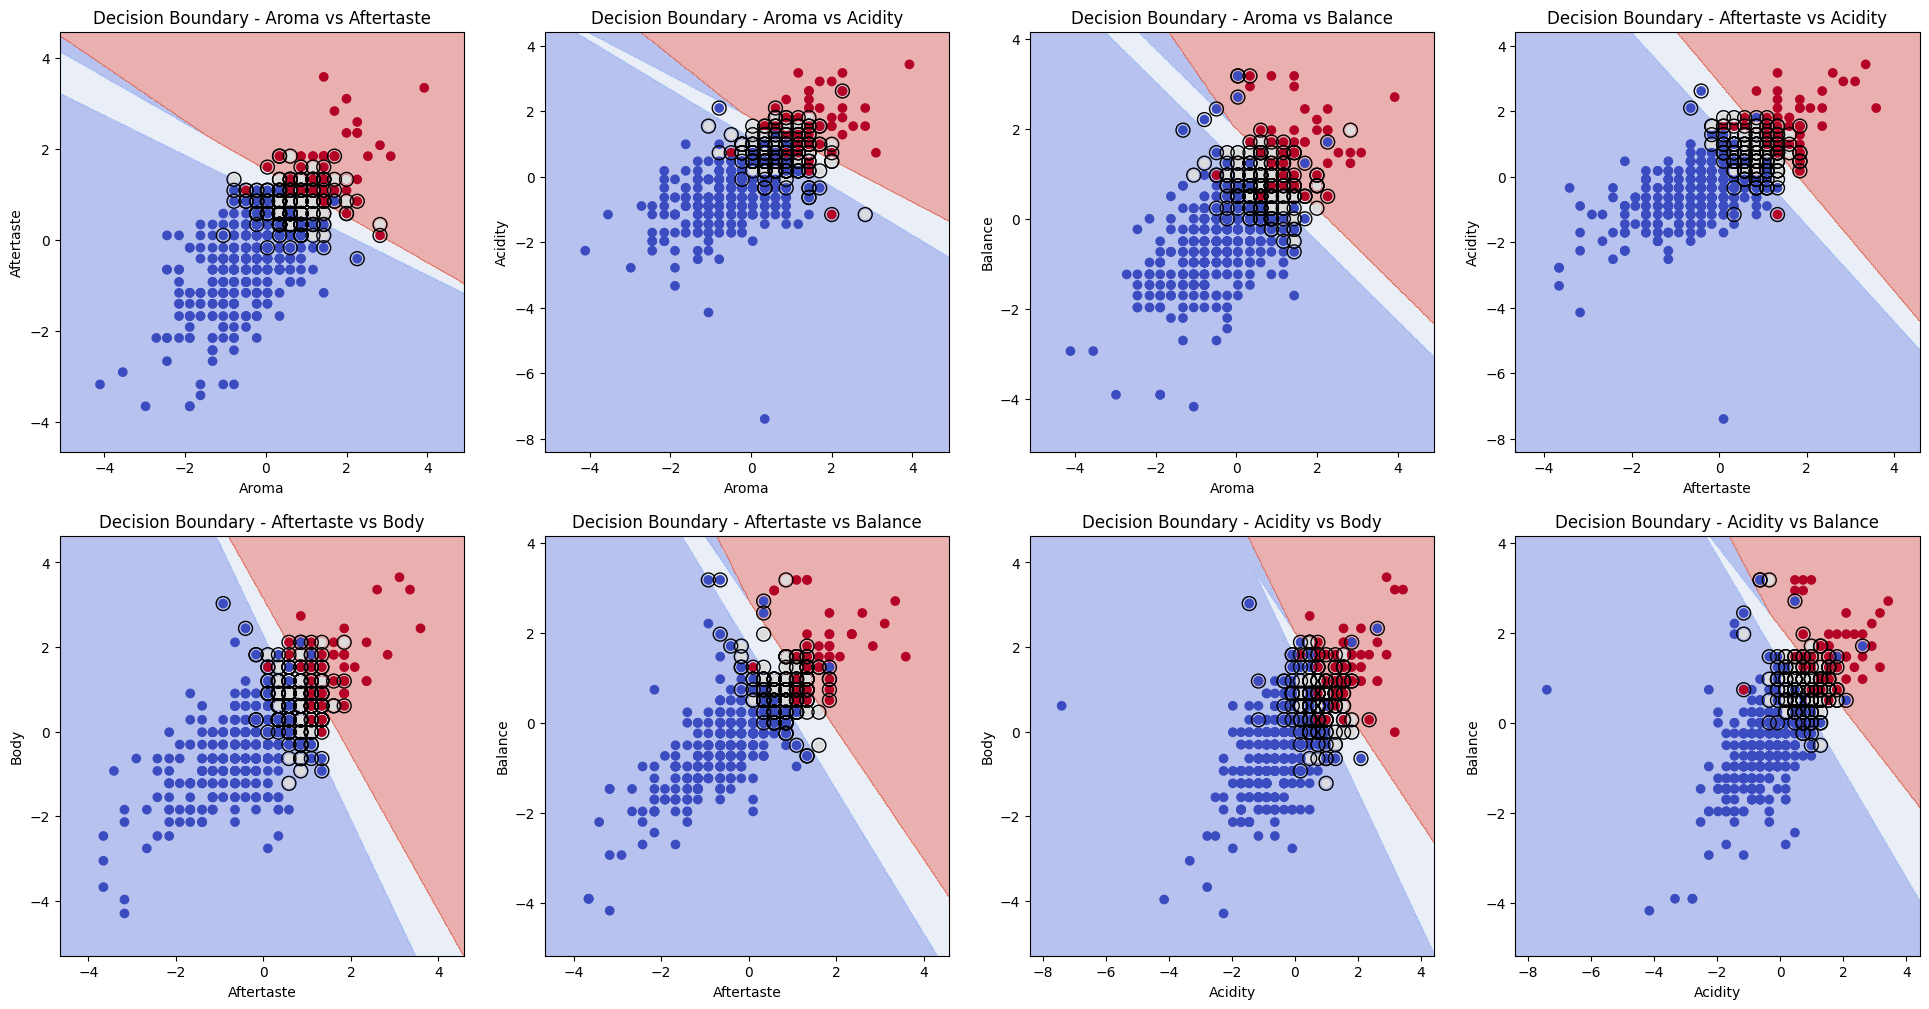
</details>


In [57]:

corr = X.corr()
upper_triangle = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
upper_triangle.columns = corr.columns
pair_corr_sort = upper_triangle.unstack().sort_values(ascending=False)
pair_corr = pair_corr_sort[abs(pair_corr_sort) > 0.5]
pair_corr

Aftertaste  Flavor       0.848
Balance     Aftertaste   0.765
Acidity     Flavor       0.753
Balance     Flavor       0.734
Flavor      Aroma        0.731
Balance     Body         0.702
Acidity     Aftertaste   0.690
Body        Aftertaste   0.685
            Flavor       0.685
Aftertaste  Aroma        0.678
Balance     Acidity      0.644
Body        Acidity      0.618
Balance     Aroma        0.612
Acidity     Aroma        0.603
Body        Aroma        0.552
dtype: float64

In [58]:
pair_title = pair_corr.index
pair_title = [(i[0], i[1]) for i in pair_title]
pair_title

[('Aftertaste', 'Flavor'),
 ('Balance', 'Aftertaste'),
 ('Acidity', 'Flavor'),
 ('Balance', 'Flavor'),
 ('Flavor', 'Aroma'),
 ('Balance', 'Body'),
 ('Acidity', 'Aftertaste'),
 ('Body', 'Aftertaste'),
 ('Body', 'Flavor'),
 ('Aftertaste', 'Aroma'),
 ('Balance', 'Acidity'),
 ('Body', 'Acidity'),
 ('Balance', 'Aroma'),
 ('Acidity', 'Aroma'),
 ('Body', 'Aroma')]

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


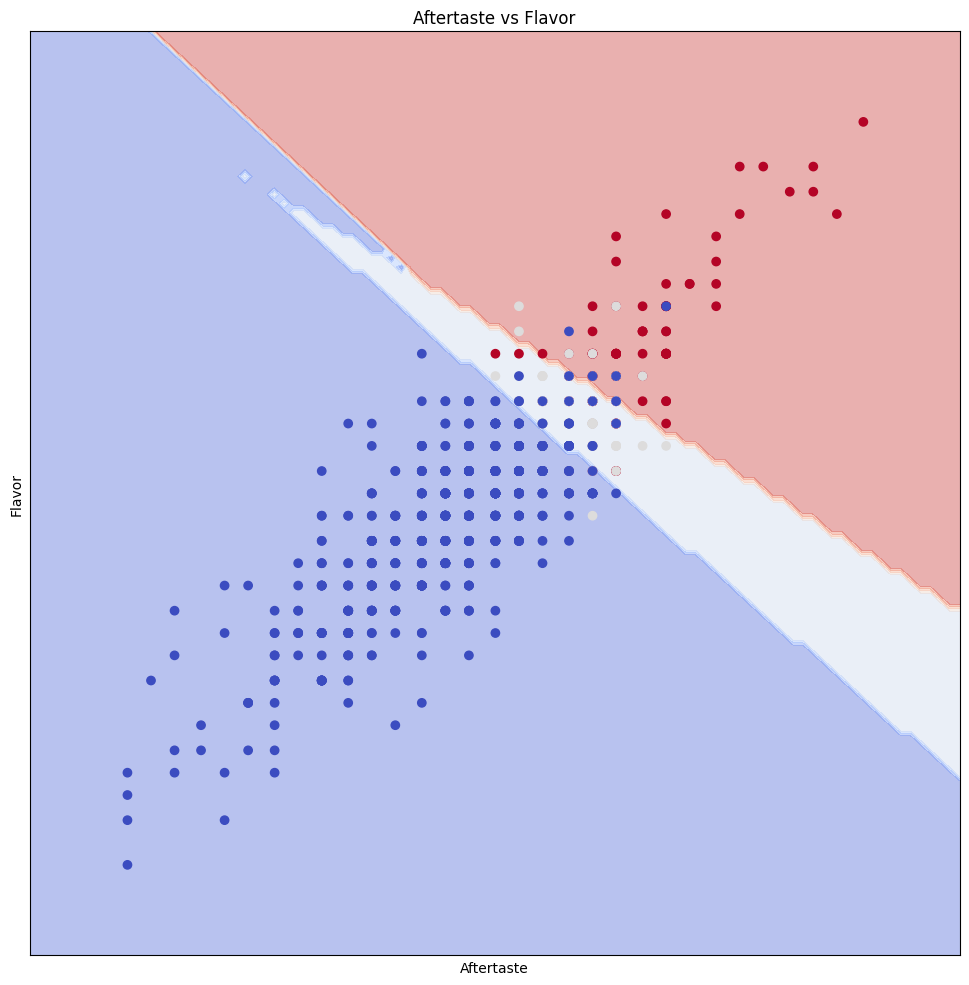

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


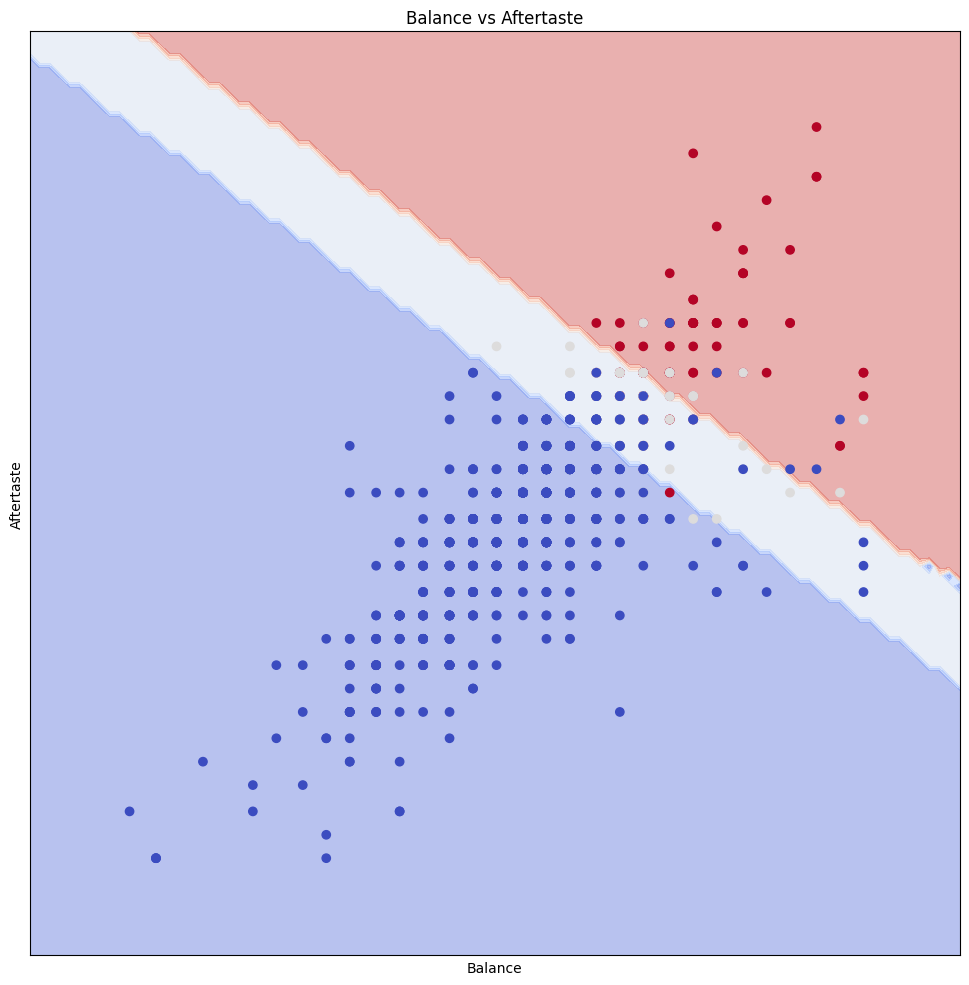

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


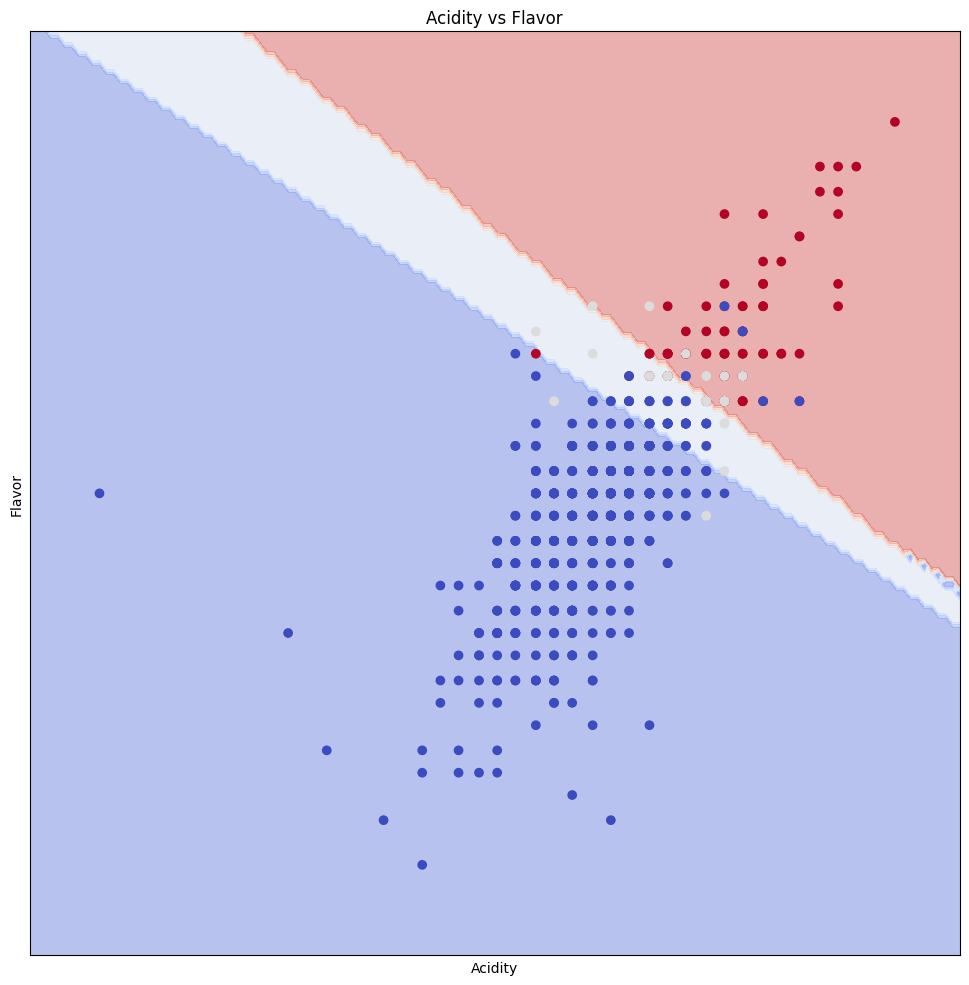

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


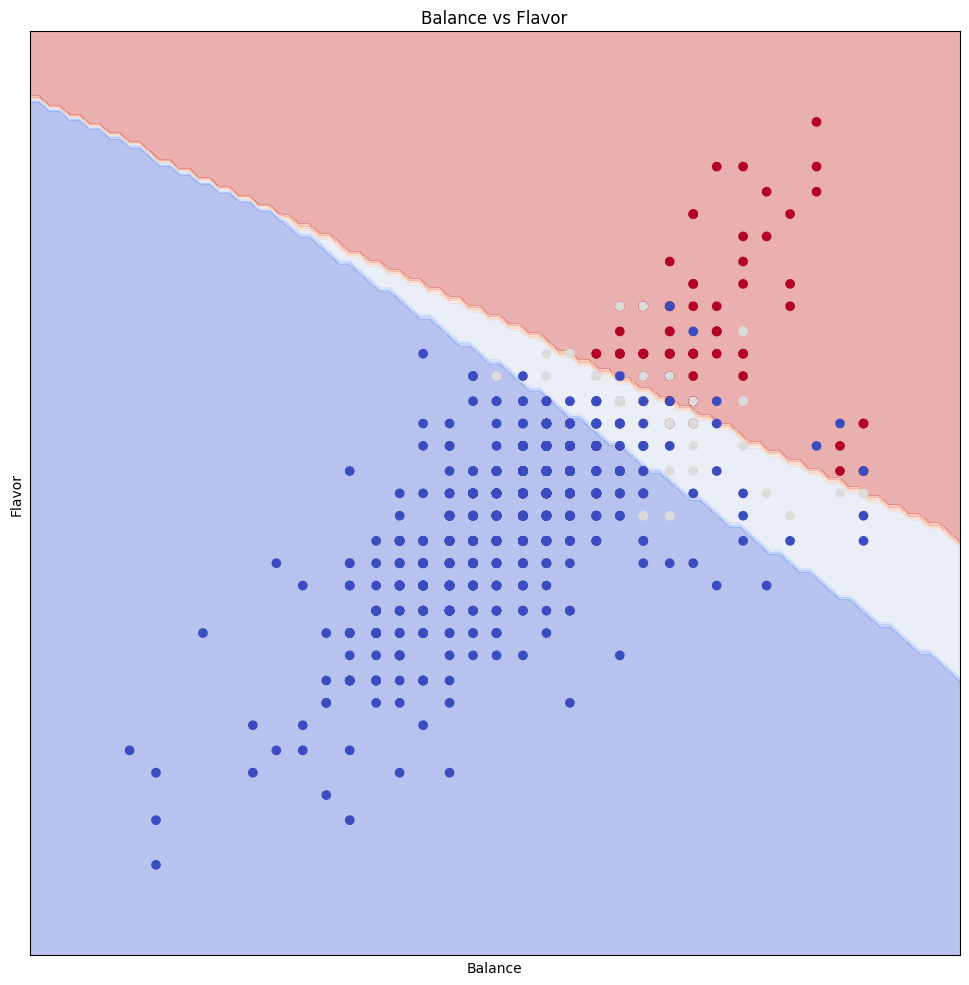

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


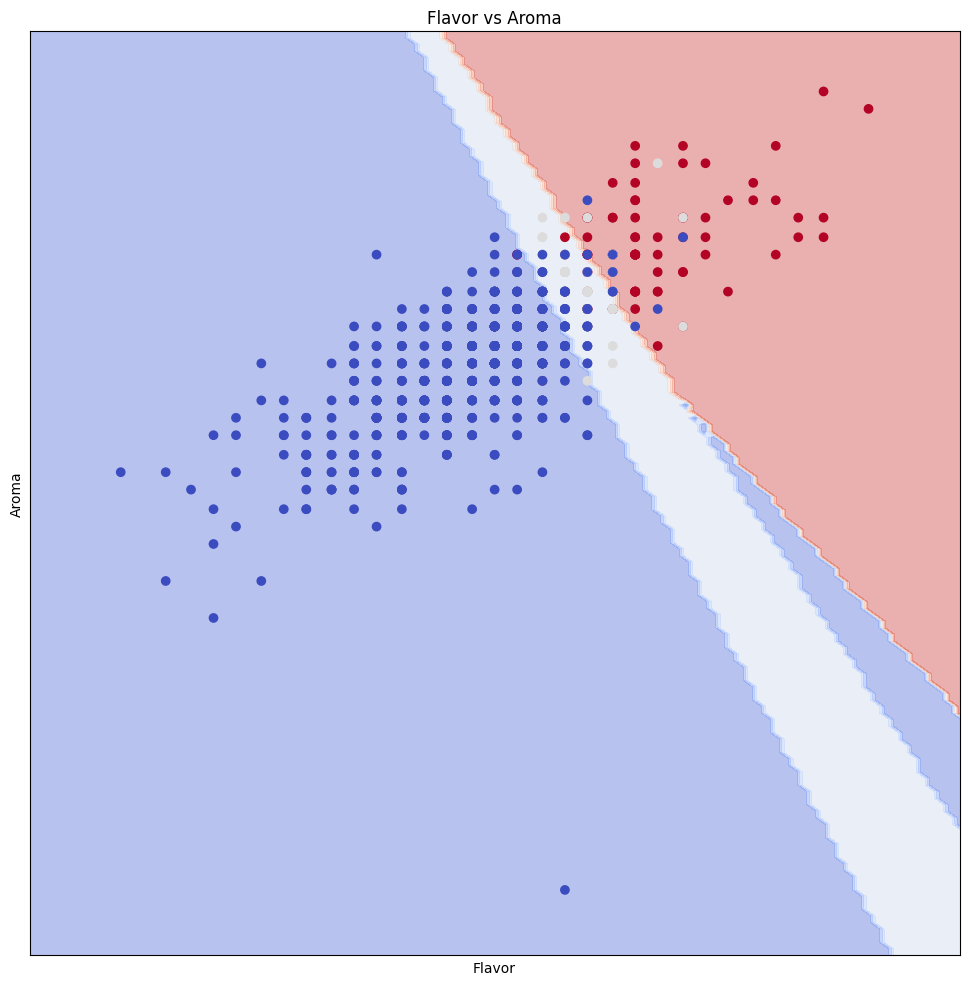

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


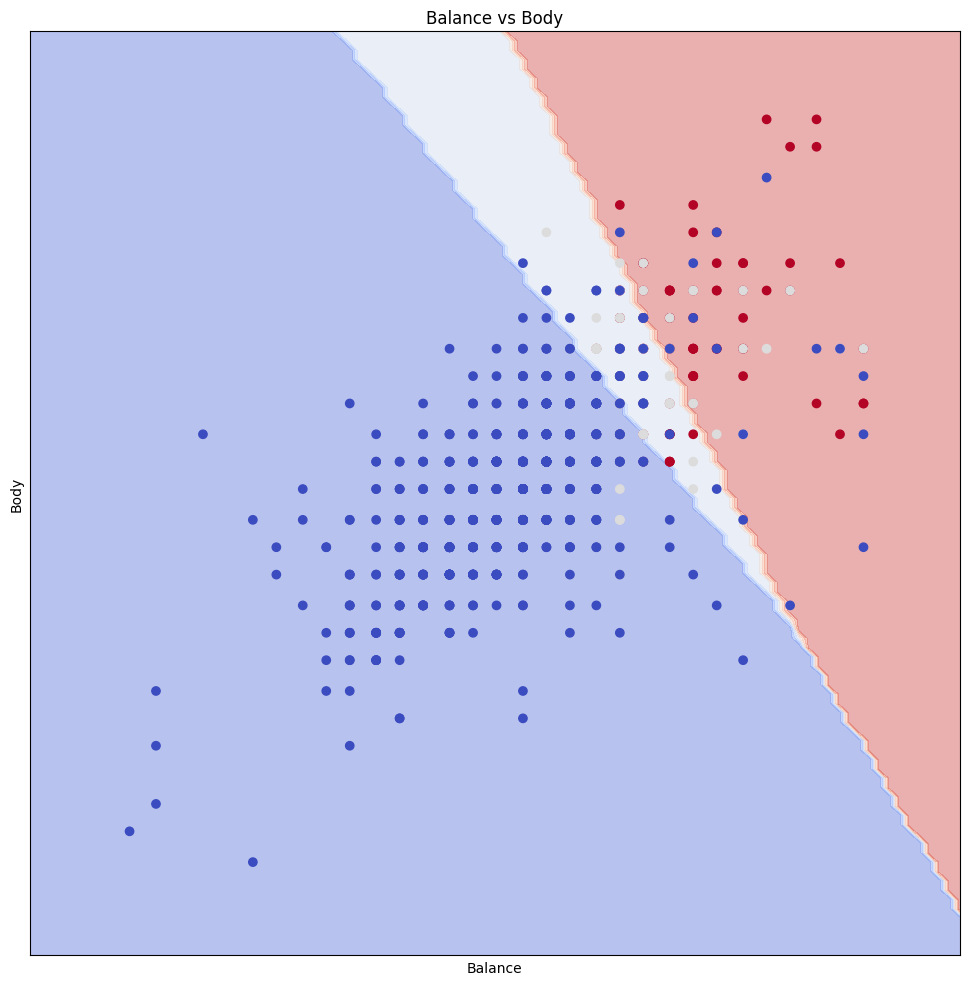

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


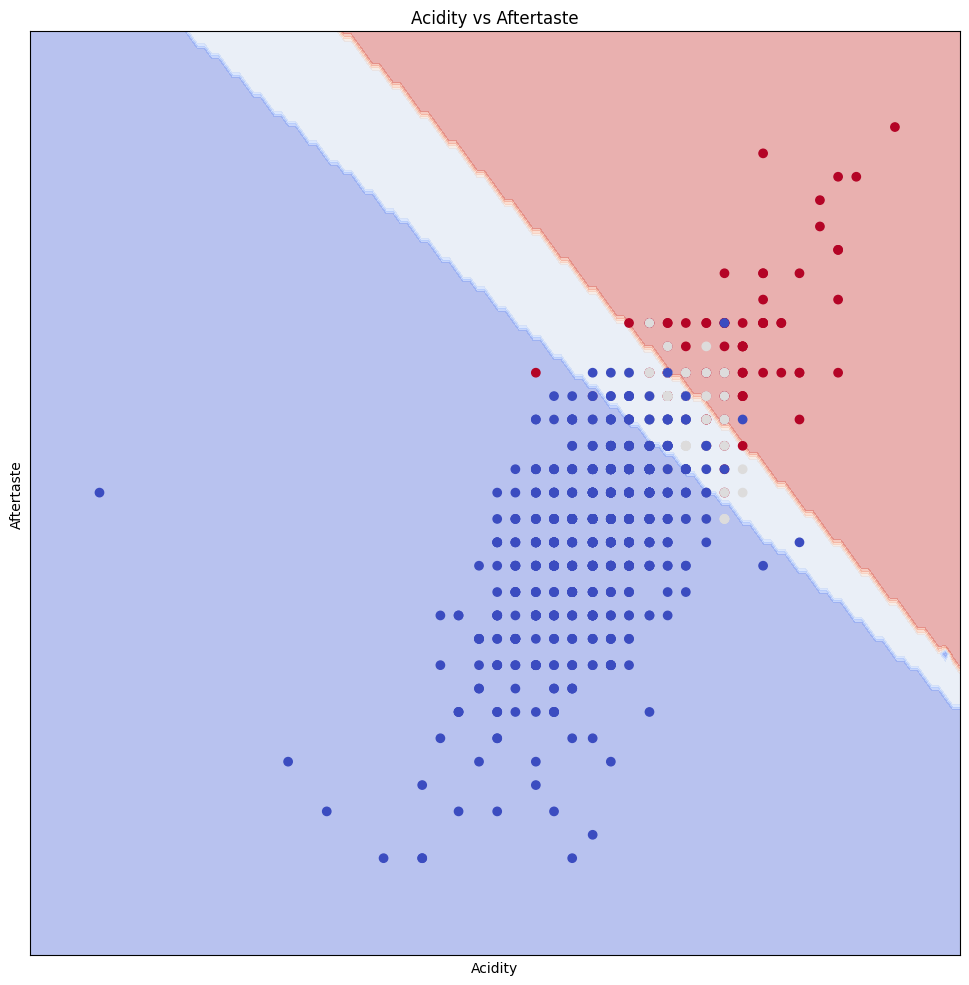

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


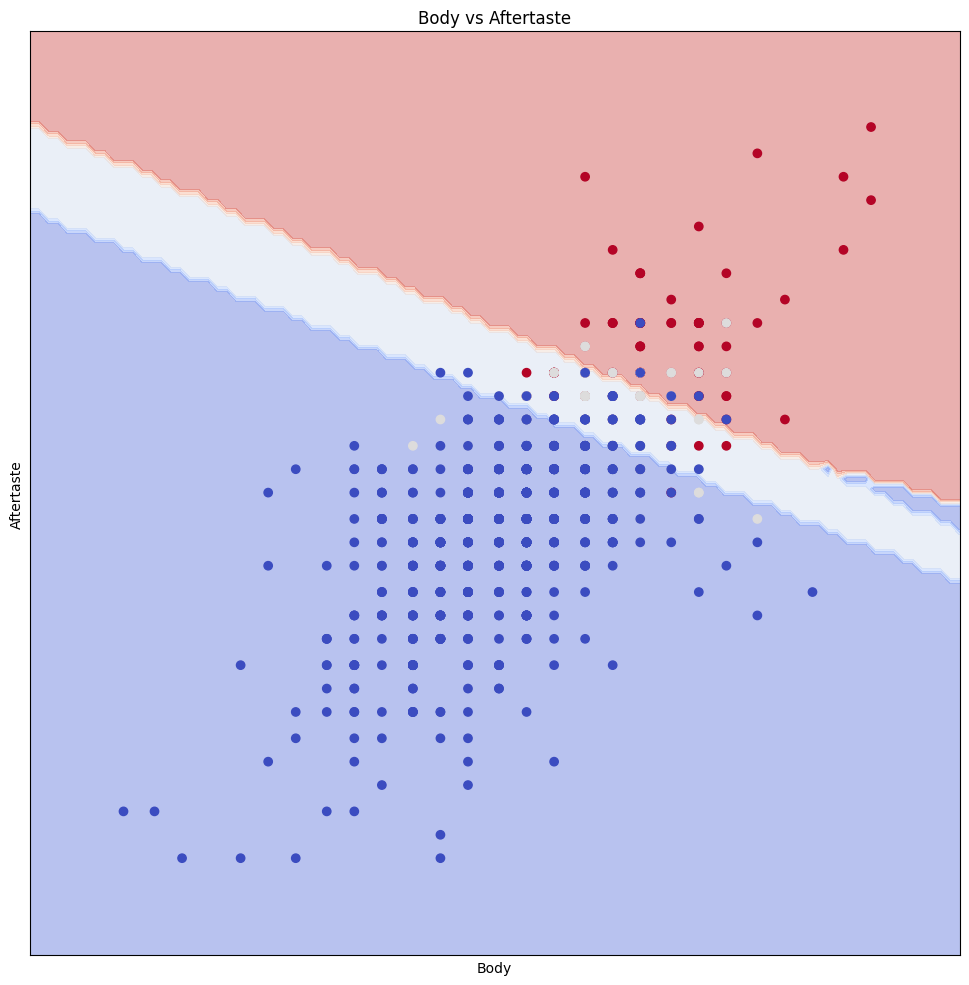

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


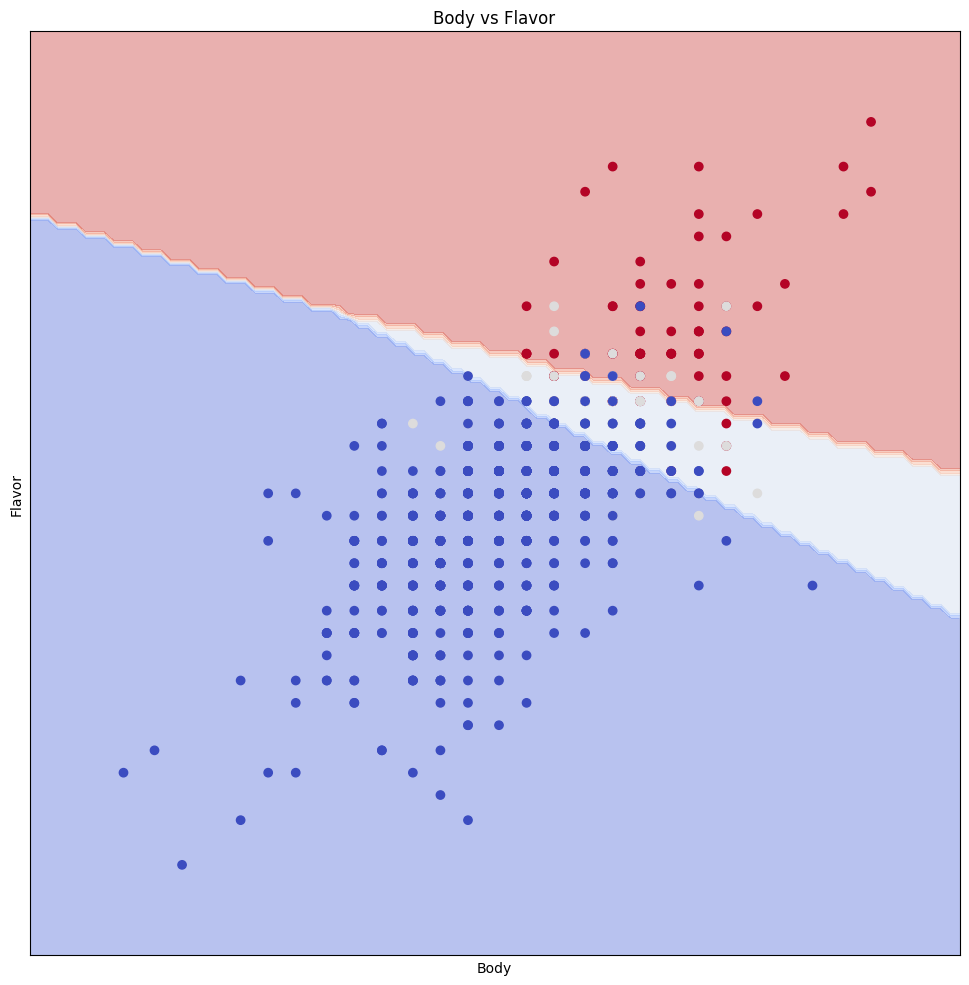

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


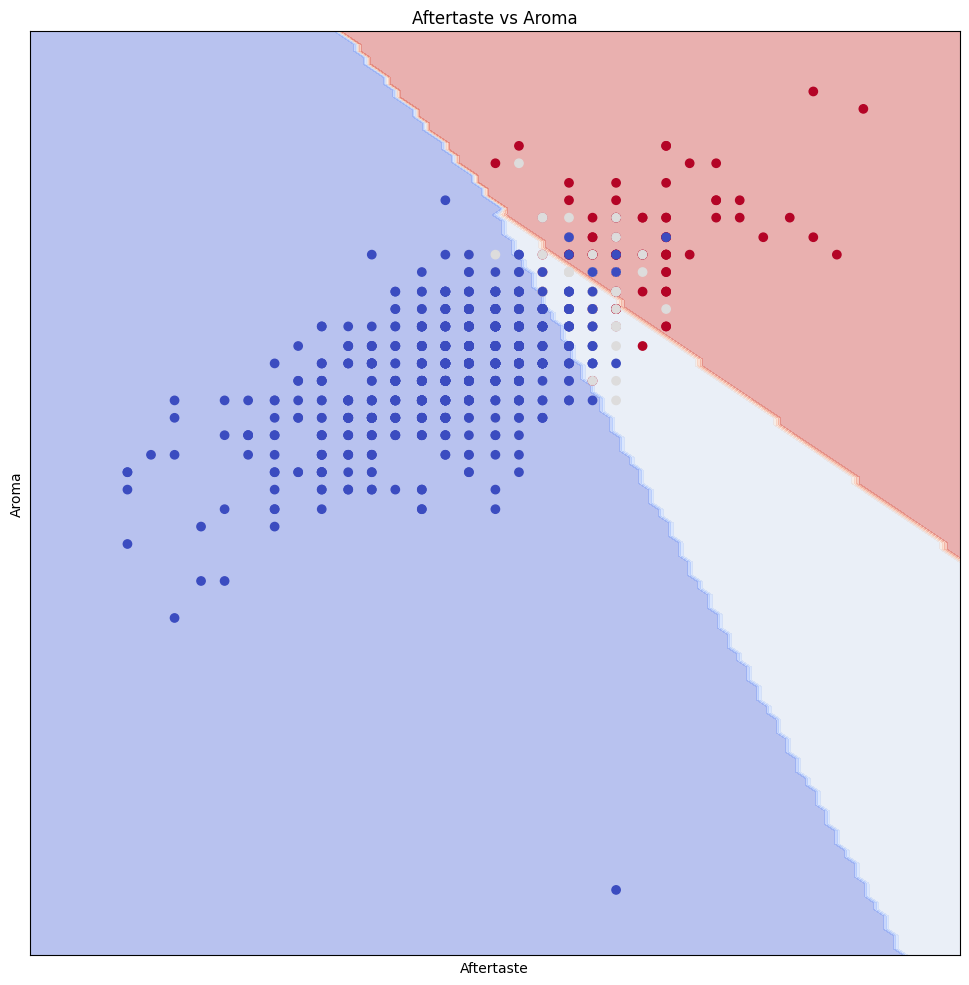

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


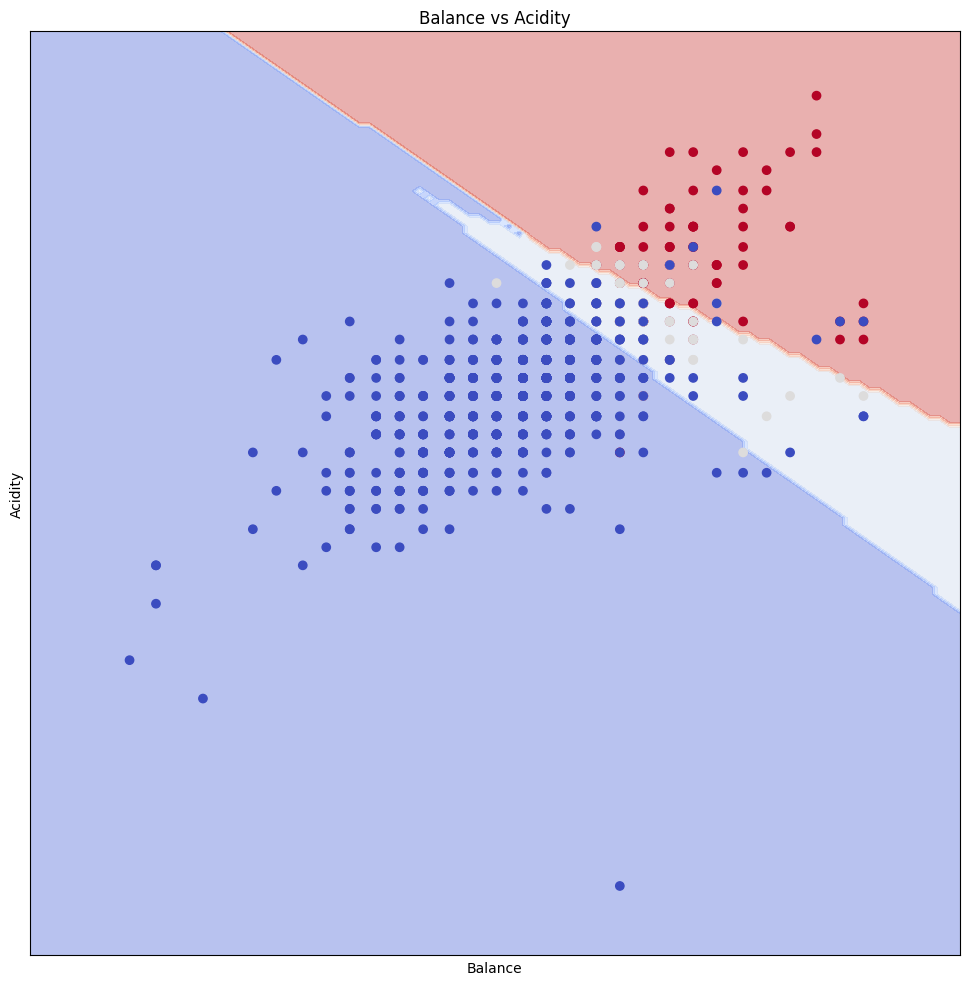

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


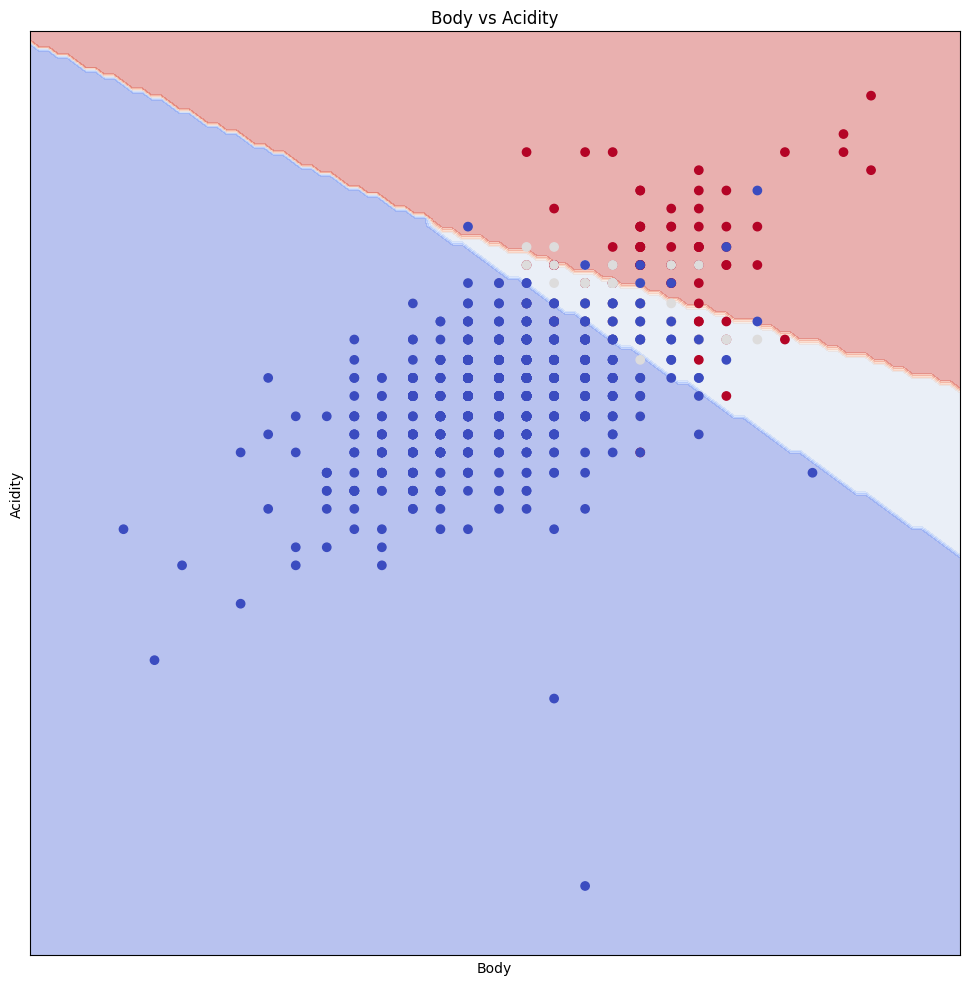

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


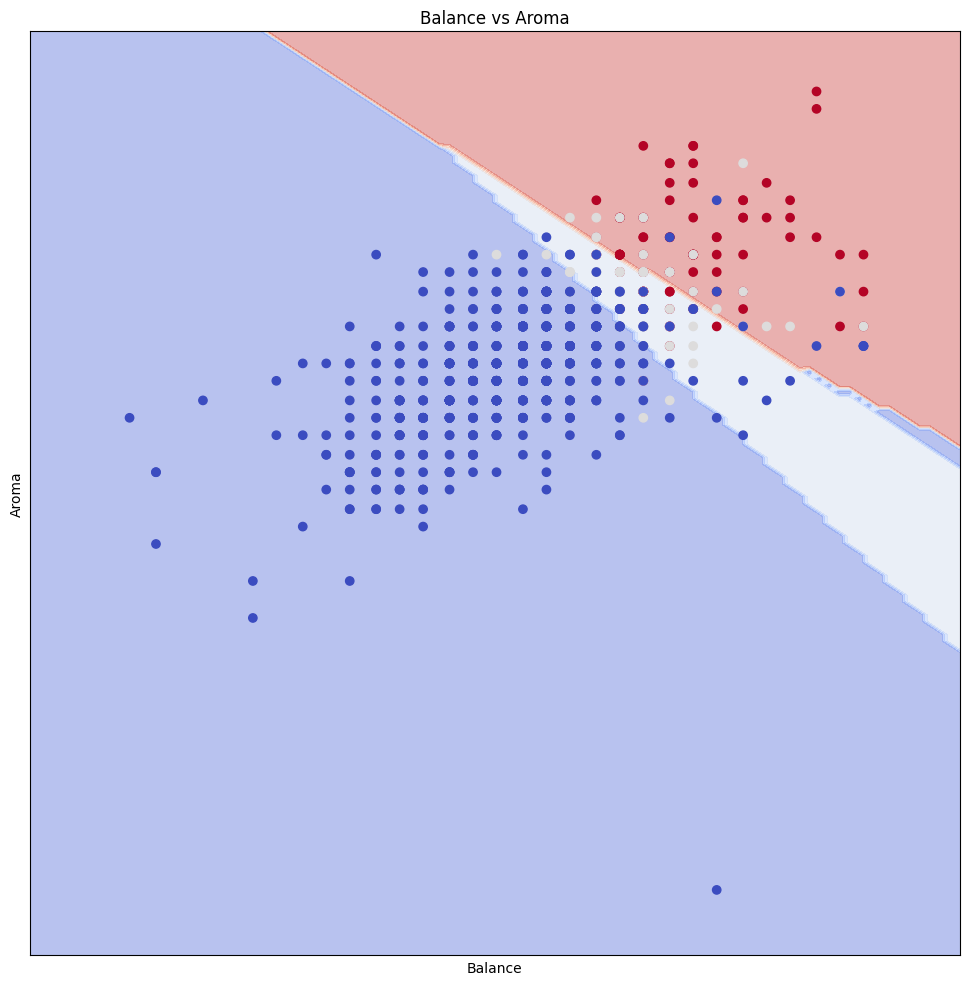

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


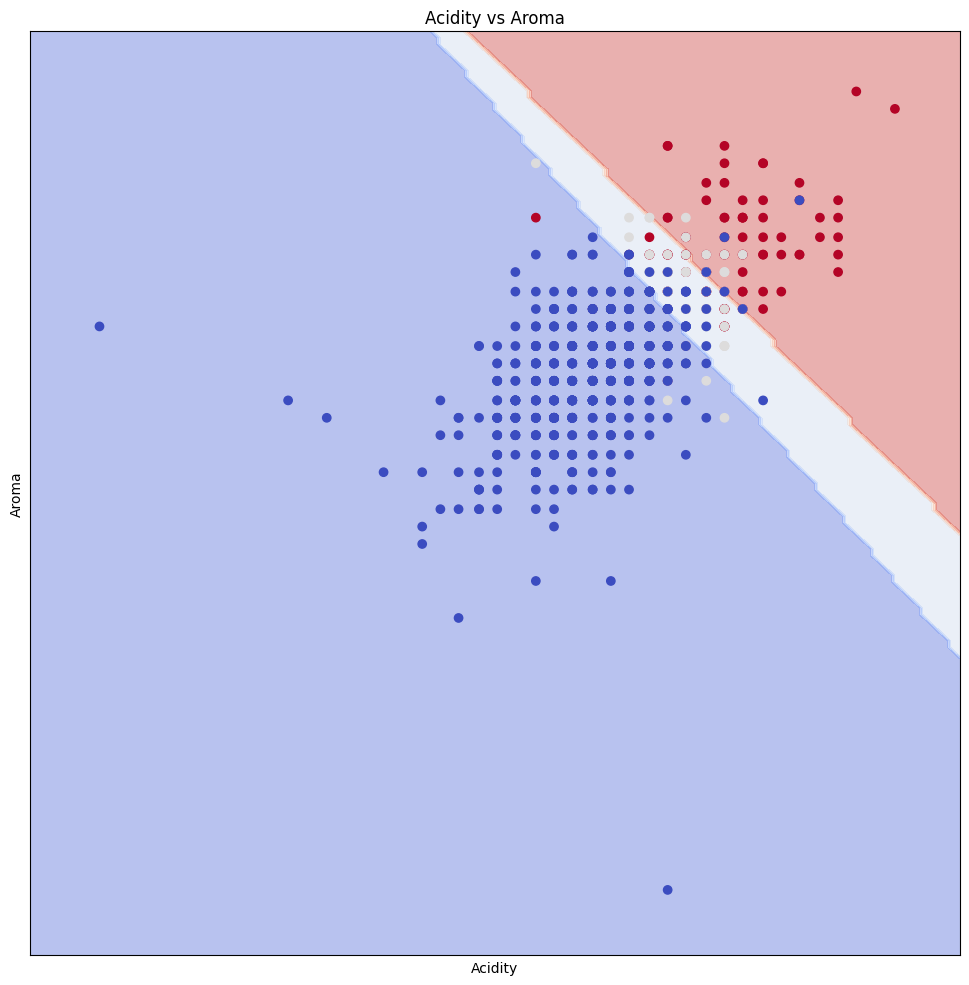

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


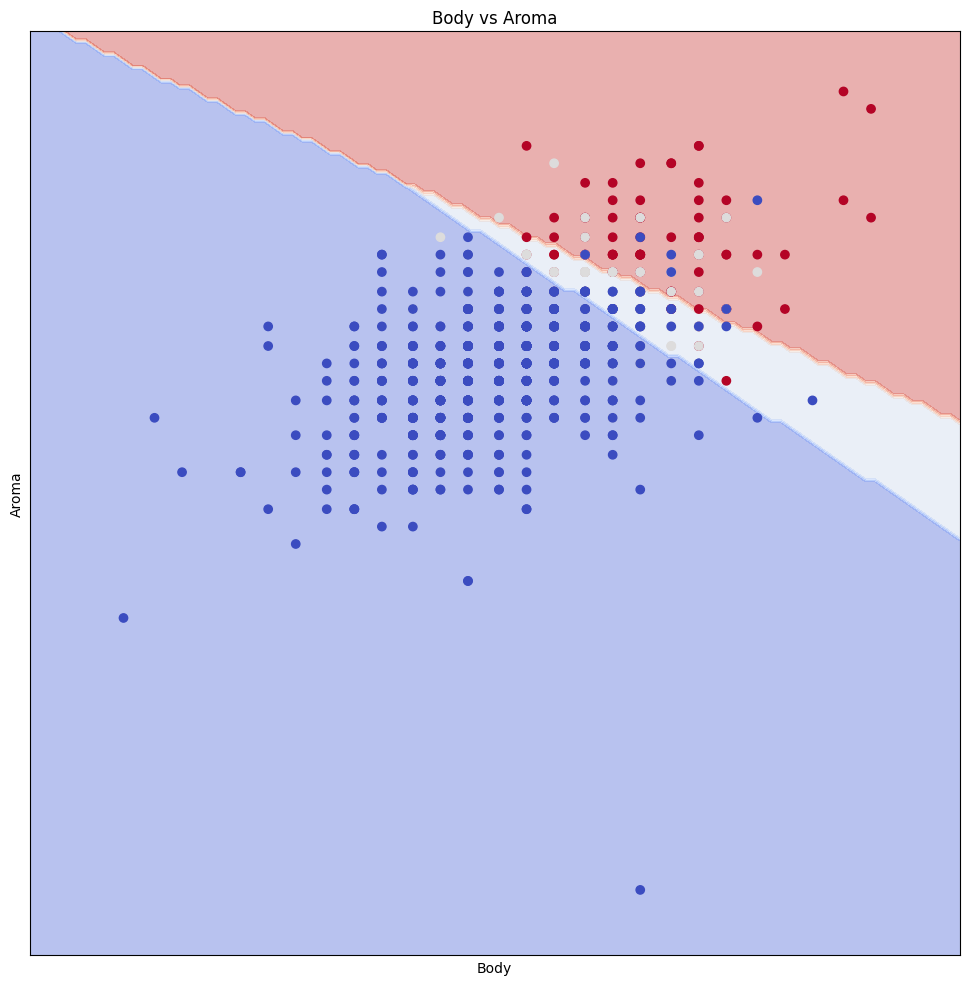

In [59]:
for pair in pair_title:
    x_min, x_max = X[pair[0]].min() - 1, X[pair[0]].max() + 1
    y_min, y_max = X[pair[1]].min() - 1, X[pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    svc_model = SVC(
        kernel=best_params['kernel'],
        C=best_params['C'],
        degree=best_params['degree'],
        gamma=best_params['gamma'],
    )
    svc_model.fit(X_train[[pair[0], pair[1]]], Y_train)
    
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[pair[0]], X[pair[1]], c=Y['Bean_grade'], cmap=plt.cm.coolwarm)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f'{pair[0]} vs {pair[1]}')
    plt.show()

### **Random Search**

**Initialize models and Search Space**

- `Support Vector Machine`

Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `SVC()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `SVM: {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 37.575, 75.05, 112.525, 150.0], 'gamma': [0.01, 0.0325, 0.05500000000000001, 0.0775, 0.1], 'degree': [2, 3]}`

</details>


In [60]:
### START CODE HERE ###

svc_model = SVC()

### END CODE HERE ###

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.


In [66]:
### START CODE HERE ###

kernel = ['linear', 'rbf', 'poly']
C_list = list(np.linspace(0.01, 10, 5, dtype=float))
gamma_list = list(np.linspace(0.01, 1, 5, dtype=float))
degree = [2, 3]
params_SVR = dict(kernel=kernel, C=C_list, gamma=gamma_list, degree=degree)

best_params = {}

grid_result = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=params_SVR,
    scoring='accuracy',
    cv=4,
    n_jobs=1,
    verbose=4,
    n_iter=60
    )
grid_result.fit(X_train, Y_train)

best_params = grid_result.best_params_
print('Best Parameters: ', best_params)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
[CV 1/4] END C=5.005, degree=3, gamma=1.0, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/4] END C=5.005, degree=3, gamma=1.0, kernel=rbf;, score=0.801 total time=   0.0s
[CV 3/4] END C=5.005, degree=3, gamma=1.0, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/4] END C=5.005, degree=3, gamma=1.0, kernel=rbf;, score=0.840 total time=   0.0s
[CV 1/4] END C=7.5024999999999995, degree=3, gamma=0.505, kernel=poly;, score=0.875 total time=   0.0s
[CV 2/4] END C=7.5024999999999995, degree=3, gamma=0.505, kernel=poly;, score=0.920 total time=   0.0s
[CV 3/4] END C=7.5024999999999995, degree=3, gamma=0.505, kernel=poly;, score=0.863 total time=   0.0s
[CV 4/4] END C=7.5024999999999995, degree=3, gamma=0.505, kernel=poly;, score=0.863 total time=   0.0s
[CV 1/4] END C=10.0, degree=3, gamma=0.7525, kernel=rbf;, score=0.875 total time=   0.0s


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 2/4] END C=10.0, degree=3, gamma=0.7525, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/4] END C=10.0, degree=3, gamma=0.7525, kernel=rbf;, score=0.851 total time=   0.0s
[CV 4/4] END C=10.0, degree=3, gamma=0.7525, kernel=rbf;, score=0.886 total time=   0.0s
[CV 1/4] END C=5.005, degree=3, gamma=0.7525, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/4] END C=5.005, degree=3, gamma=0.7525, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/4] END C=5.005, degree=3, gamma=0.7525, kernel=rbf;, score=0.851 total time=   0.0s
[CV 4/4] END C=5.005, degree=3, gamma=0.7525, kernel=rbf;, score=0.880 total time=   0.0s
[CV 1/4] END C=5.005, degree=2, gamma=0.01, kernel=rbf;, score=0.926 total time=   0.0s
[CV 2/4] END C=5.005, degree=2, gamma=0.01, kernel=rbf;, score=0.926 total time=   0.0s
[CV 3/4] END C=5.005, degree=2, gamma=0.01, kernel=rbf;, score=0.937 total time=   0.0s
[CV 4/4] END C=5.005, degree=2, gamma=0.01, kernel=rbf;, score=0.909 total time=   0.0s


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 1/4] END C=10.0, degree=3, gamma=0.2575, kernel=rbf;, score=0.932 total time=   0.0s
[CV 2/4] END C=10.0, degree=3, gamma=0.2575, kernel=rbf;, score=0.903 total time=   0.0s
[CV 3/4] END C=10.0, degree=3, gamma=0.2575, kernel=rbf;, score=0.886 total time=   0.0s
[CV 4/4] END C=10.0, degree=3, gamma=0.2575, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/4] END C=2.5075, degree=2, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/4] END C=2.5075, degree=2, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.0s
[CV 3/4] END C=2.5075, degree=2, gamma=0.01, kernel=rbf;, score=0.926 total time=   0.0s
[CV 4/4] END C=2.5075, degree=2, gamma=0.01, kernel=rbf;, score=0.903 total time=   0.0s
[CV 1/4] END C=5.005, degree=3, gamma=0.7525, kernel=poly;, score=0.864 total time=   0.0s
[CV 2/4] END C=5.005, degree=3, gamma=0.7525, kernel=poly;, score=0.915 total time=   0.0s
[CV 3/4] END C=5.005, degree=3, gamma=0.7525, kernel=poly;, score=0.863 total time=   0.0s
[CV 4/4] END C=

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=0.01, degree=2, gamma=0.01, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=0.505, kernel=linear;, score=0.818 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=0.505, kernel=linear;, score=0.795 total time=   0.0s
[CV 3/4] END C=0.01, degree=3, gamma=0.505, kernel=linear;, score=0.817 total time=   0.0s
[CV 4/4] END C=0.01, degree=3, gamma=0.505, kernel=linear;, score=0.823 total time=   0.0s
[CV 1/4] END C=10.0, degree=2, gamma=0.7525, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/4] END C=10.0, degree=2, gamma=0.7525, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=10.0, degree=2, gamma=0.7525, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=10.0, degree=2, gamma=0.7525, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/4] END C=0.01, degree=2, gamma=0.7525, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/4] END C=0.01, degree=2, gamma=0.7525, kernel=rbf;, score=0.733 total time=   0.0s
[CV

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=10.0, degree=2, gamma=0.505, kernel=poly;, score=0.863 total time=   0.0s
[CV 1/4] END C=2.5075, degree=2, gamma=1.0, kernel=rbf;, score=0.858 total time=   0.0s
[CV 2/4] END C=2.5075, degree=2, gamma=1.0, kernel=rbf;, score=0.807 total time=   0.0s
[CV 3/4] END C=2.5075, degree=2, gamma=1.0, kernel=rbf;, score=0.794 total time=   0.0s
[CV 4/4] END C=2.5075, degree=2, gamma=1.0, kernel=rbf;, score=0.834 total time=   0.0s
[CV 1/4] END C=10.0, degree=2, gamma=1.0, kernel=poly;, score=0.841 total time=   0.0s
[CV 2/4] END C=10.0, degree=2, gamma=1.0, kernel=poly;, score=0.858 total time=   0.0s
[CV 3/4] END C=10.0, degree=2, gamma=1.0, kernel=poly;, score=0.880 total time=   0.0s
[CV 4/4] END C=10.0, degree=2, gamma=1.0, kernel=poly;, score=0.869 total time=   0.0s
[CV 1/4] END C=0.01, degree=2, gamma=0.505, kernel=poly;, score=0.778 total time=   0.0s
[CV 2/4] END C=0.01, degree=2, gamma=0.505, kernel=poly;, score=0.790 total time=   0.0s
[CV 3/4] END C=0.01, degree=2, ga

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=0.01, degree=2, gamma=0.505, kernel=poly;, score=0.806 total time=   0.0s
[CV 1/4] END C=5.005, degree=2, gamma=0.505, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/4] END C=5.005, degree=2, gamma=0.505, kernel=linear;, score=0.943 total time=   0.0s
[CV 3/4] END C=5.005, degree=2, gamma=0.505, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=5.005, degree=2, gamma=0.505, kernel=linear;, score=0.926 total time=   0.0s
[CV 1/4] END C=2.5075, degree=3, gamma=0.505, kernel=rbf;, score=0.898 total time=   0.0s
[CV 2/4] END C=2.5075, degree=3, gamma=0.505, kernel=rbf;, score=0.858 total time=   0.0s
[CV 3/4] END C=2.5075, degree=3, gamma=0.505, kernel=rbf;, score=0.869 total time=   0.0s
[CV 4/4] END C=2.5075, degree=3, gamma=0.505, kernel=rbf;, score=0.897 total time=   0.0s
[CV 1/4] END C=7.5024999999999995, degree=2, gamma=0.505, kernel=poly;, score=0.881 total time=   0.0s
[CV 2/4] END C=7.5024999999999995, degree=2, gamma=0.505, kernel=poly;, score=0.

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 1/4] END C=7.5024999999999995, degree=3, gamma=0.7525, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/4] END C=7.5024999999999995, degree=3, gamma=0.7525, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/4] END C=7.5024999999999995, degree=3, gamma=0.7525, kernel=rbf;, score=0.851 total time=   0.0s
[CV 4/4] END C=7.5024999999999995, degree=3, gamma=0.7525, kernel=rbf;, score=0.886 total time=   0.0s
[CV 1/4] END C=7.5024999999999995, degree=2, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 2/4] END C=7.5024999999999995, degree=2, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=7.5024999999999995, degree=2, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=7.5024999999999995, degree=2, gamma=0.01, kernel=linear;, score=0.926 total time=   0.0s
[CV 1/4] END C=5.005, degree=2, gamma=0.2575, kernel=poly;, score=0.875 total time=   0.0s
[CV 2/4] END C=5.005, degree=2, gamma=0.2575, kernel=poly;, score=0.898 total tim

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 2/4] END C=2.5075, degree=3, gamma=0.01, kernel=poly;, score=0.733 total time=   0.0s
[CV 3/4] END C=2.5075, degree=3, gamma=0.01, kernel=poly;, score=0.754 total time=   0.0s
[CV 4/4] END C=2.5075, degree=3, gamma=0.01, kernel=poly;, score=0.749 total time=   0.0s
[CV 1/4] END C=10.0, degree=2, gamma=1.0, kernel=rbf;, score=0.847 total time=   0.0s
[CV 2/4] END C=10.0, degree=2, gamma=1.0, kernel=rbf;, score=0.801 total time=   0.0s
[CV 3/4] END C=10.0, degree=2, gamma=1.0, kernel=rbf;, score=0.800 total time=   0.0s
[CV 4/4] END C=10.0, degree=2, gamma=1.0, kernel=rbf;, score=0.834 total time=   0.0s
[CV 1/4] END C=5.005, degree=3, gamma=0.01, kernel=poly;, score=0.756 total time=   0.0s
[CV 2/4] END C=5.005, degree=3, gamma=0.01, kernel=poly;, score=0.744 total time=   0.0s
[CV 3/4] END C=5.005, degree=3, gamma=0.01, kernel=poly;, score=0.760 total time=   0.0s
[CV 4/4] END C=5.005, degree=3, gamma=0.01, kernel=poly;, score=0.754 total time=   0.0s
[CV 1/4] END C=0.01, degree=3,

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 1/4] END C=5.005, degree=2, gamma=0.505, kernel=rbf;, score=0.898 total time=   0.0s
[CV 2/4] END C=5.005, degree=2, gamma=0.505, kernel=rbf;, score=0.858 total time=   0.0s
[CV 3/4] END C=5.005, degree=2, gamma=0.505, kernel=rbf;, score=0.869 total time=   0.0s
[CV 4/4] END C=5.005, degree=2, gamma=0.505, kernel=rbf;, score=0.903 total time=   0.0s
[CV 1/4] END C=2.5075, degree=2, gamma=0.01, kernel=linear;, score=0.926 total time=   0.0s
[CV 2/4] END C=2.5075, degree=2, gamma=0.01, kernel=linear;, score=0.938 total time=   0.0s
[CV 3/4] END C=2.5075, degree=2, gamma=0.01, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=2.5075, degree=2, gamma=0.01, kernel=linear;, score=0.914 total time=   0.0s
[CV 1/4] END C=10.0, degree=3, gamma=0.7525, kernel=linear;, score=0.915 total time=   0.0s
[CV 2/4] END C=10.0, degree=3, gamma=0.7525, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=10.0, degree=3, gamma=0.7525, kernel=linear;, score=0.920 total time=   0.0s


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 4/4] END C=2.5075, degree=3, gamma=0.505, kernel=poly;, score=0.863 total time=   0.0s
[CV 1/4] END C=2.5075, degree=3, gamma=0.7525, kernel=poly;, score=0.875 total time=   0.0s
[CV 2/4] END C=2.5075, degree=3, gamma=0.7525, kernel=poly;, score=0.920 total time=   0.0s
[CV 3/4] END C=2.5075, degree=3, gamma=0.7525, kernel=poly;, score=0.863 total time=   0.0s
[CV 4/4] END C=2.5075, degree=3, gamma=0.7525, kernel=poly;, score=0.869 total time=   0.0s
[CV 1/4] END C=2.5075, degree=3, gamma=1.0, kernel=poly;, score=0.864 total time=   0.0s
[CV 2/4] END C=2.5075, degree=3, gamma=1.0, kernel=poly;, score=0.915 total time=   0.0s
[CV 3/4] END C=2.5075, degree=3, gamma=1.0, kernel=poly;, score=0.863 total time=   0.0s
[CV 4/4] END C=2.5075, degree=3, gamma=1.0, kernel=poly;, score=0.857 total time=   0.0s
[CV 1/4] END C=2.5075, degree=3, gamma=0.01, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/4] END C=2.5075, degree=3, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.0s
[CV 3/4

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 1/4] END C=10.0, degree=3, gamma=0.505, kernel=poly;, score=0.875 total time=   0.0s
[CV 2/4] END C=10.0, degree=3, gamma=0.505, kernel=poly;, score=0.920 total time=   0.0s
[CV 3/4] END C=10.0, degree=3, gamma=0.505, kernel=poly;, score=0.863 total time=   0.0s
[CV 4/4] END C=10.0, degree=3, gamma=0.505, kernel=poly;, score=0.869 total time=   0.0s
[CV 1/4] END C=7.5024999999999995, degree=3, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.0s
[CV 2/4] END C=7.5024999999999995, degree=3, gamma=0.01, kernel=rbf;, score=0.926 total time=   0.0s
[CV 3/4] END C=7.5024999999999995, degree=3, gamma=0.01, kernel=rbf;, score=0.931 total time=   0.0s
[CV 4/4] END C=7.5024999999999995, degree=3, gamma=0.01, kernel=rbf;, score=0.903 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=0.7525, kernel=poly;, score=0.903 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=0.7525, kernel=poly;, score=0.915 total time=   0.0s
[CV 3/4] END C=0.01, degree=3, gamma=0.7525, kernel=poly;, s

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 2/4] END C=10.0, degree=2, gamma=0.2575, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=10.0, degree=2, gamma=0.2575, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=10.0, degree=2, gamma=0.2575, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/4] END C=0.01, degree=3, gamma=1.0, kernel=rbf;, score=0.739 total time=   0.0s
[CV 2/4] END C=0.01, degree=3, gamma=1.0, kernel=rbf;, score=0.733 total time=   0.0s
[CV 3/4] END C=0.01, degree=3, gamma=1.0, kernel=rbf;, score=0.743 total time=   0.0s
[CV 4/4] END C=0.01, degree=3, gamma=1.0, kernel=rbf;, score=0.743 total time=   0.0s
[CV 1/4] END C=10.0, degree=2, gamma=0.7525, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/4] END C=10.0, degree=2, gamma=0.7525, kernel=rbf;, score=0.824 total time=   0.0s
[CV 3/4] END C=10.0, degree=2, gamma=0.7525, kernel=rbf;, score=0.851 total time=   0.0s
[CV 4/4] END C=10.0, degree=2, gamma=0.7525, kernel=rbf;, score=0.886 total time=   0.0s


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

[CV 1/4] END C=5.005, degree=2, gamma=0.2575, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/4] END C=5.005, degree=2, gamma=0.2575, kernel=rbf;, score=0.915 total time=   0.0s
[CV 3/4] END C=5.005, degree=2, gamma=0.2575, kernel=rbf;, score=0.891 total time=   0.0s
[CV 4/4] END C=5.005, degree=2, gamma=0.2575, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/4] END C=7.5024999999999995, degree=3, gamma=0.2575, kernel=linear;, score=0.920 total time=   0.0s
[CV 2/4] END C=7.5024999999999995, degree=3, gamma=0.2575, kernel=linear;, score=0.955 total time=   0.0s
[CV 3/4] END C=7.5024999999999995, degree=3, gamma=0.2575, kernel=linear;, score=0.920 total time=   0.0s
[CV 4/4] END C=7.5024999999999995, degree=3, gamma=0.2575, kernel=linear;, score=0.926 total time=   0.0s
Best Parameters:  {'kernel': 'linear', 'gamma': 0.01, 'degree': 3, 'C': 7.5024999999999995}


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:122

Utilize the best parameters obtained from random search to create a SVM model. Compare the predicted values of the model with those in the Y_test DataFrame, calculate the confusion matrix the precision, recall, F1-Score, support of each output class, and model accuracy.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
- Confusion Matrix:
 [[217   6   1]
 [ 11   32   3]
 [  0    5  26]]
   Precision  Recall  F1-Score  Support
0      0.952   0.969     0.960      224
1      0.744   0.696     0.719       46
2      0.867   0.839     0.852       31

Accuracy:  0.9136212624584718
```

</details>


In [62]:
### START CODE HERE ###

svc_model = SVC(
    kernel=best_params['kernel'],
    C=best_params['C'],
    degree=best_params['degree'],
    gamma=best_params['gamma'],
)
svc_model.fit(X_train, Y_train)
predictions = svc_model.predict(X_test)

confusion_matrix = metrics.confusion_matrix(Y_test, predictions)
class_report = metrics.classification_report(Y_test, predictions)
accuracy = metrics.accuracy_score(Y_test, predictions)

print('Confusion Matrix: \n', confusion_matrix)
print('Classification Report: \n', class_report)
print('Accuracy: ', accuracy)

### END CODE HERE ###

Confusion Matrix: 
 [[220   6   1]
 [ 10  27   1]
 [  0   8  28]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.96       227
           2       0.66      0.71      0.68        38
           3       0.93      0.78      0.85        36

    accuracy                           0.91       301
   macro avg       0.85      0.82      0.83       301
weighted avg       0.92      0.91      0.91       301

Accuracy:  0.9136212624584718


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Select 4 pairs of features then polt the decision boundary.**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html
- For plotting the decision boundary, select features X with a correlation to Y greater than 0.5. This ensures that the decision boundary will depict all three classes.

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
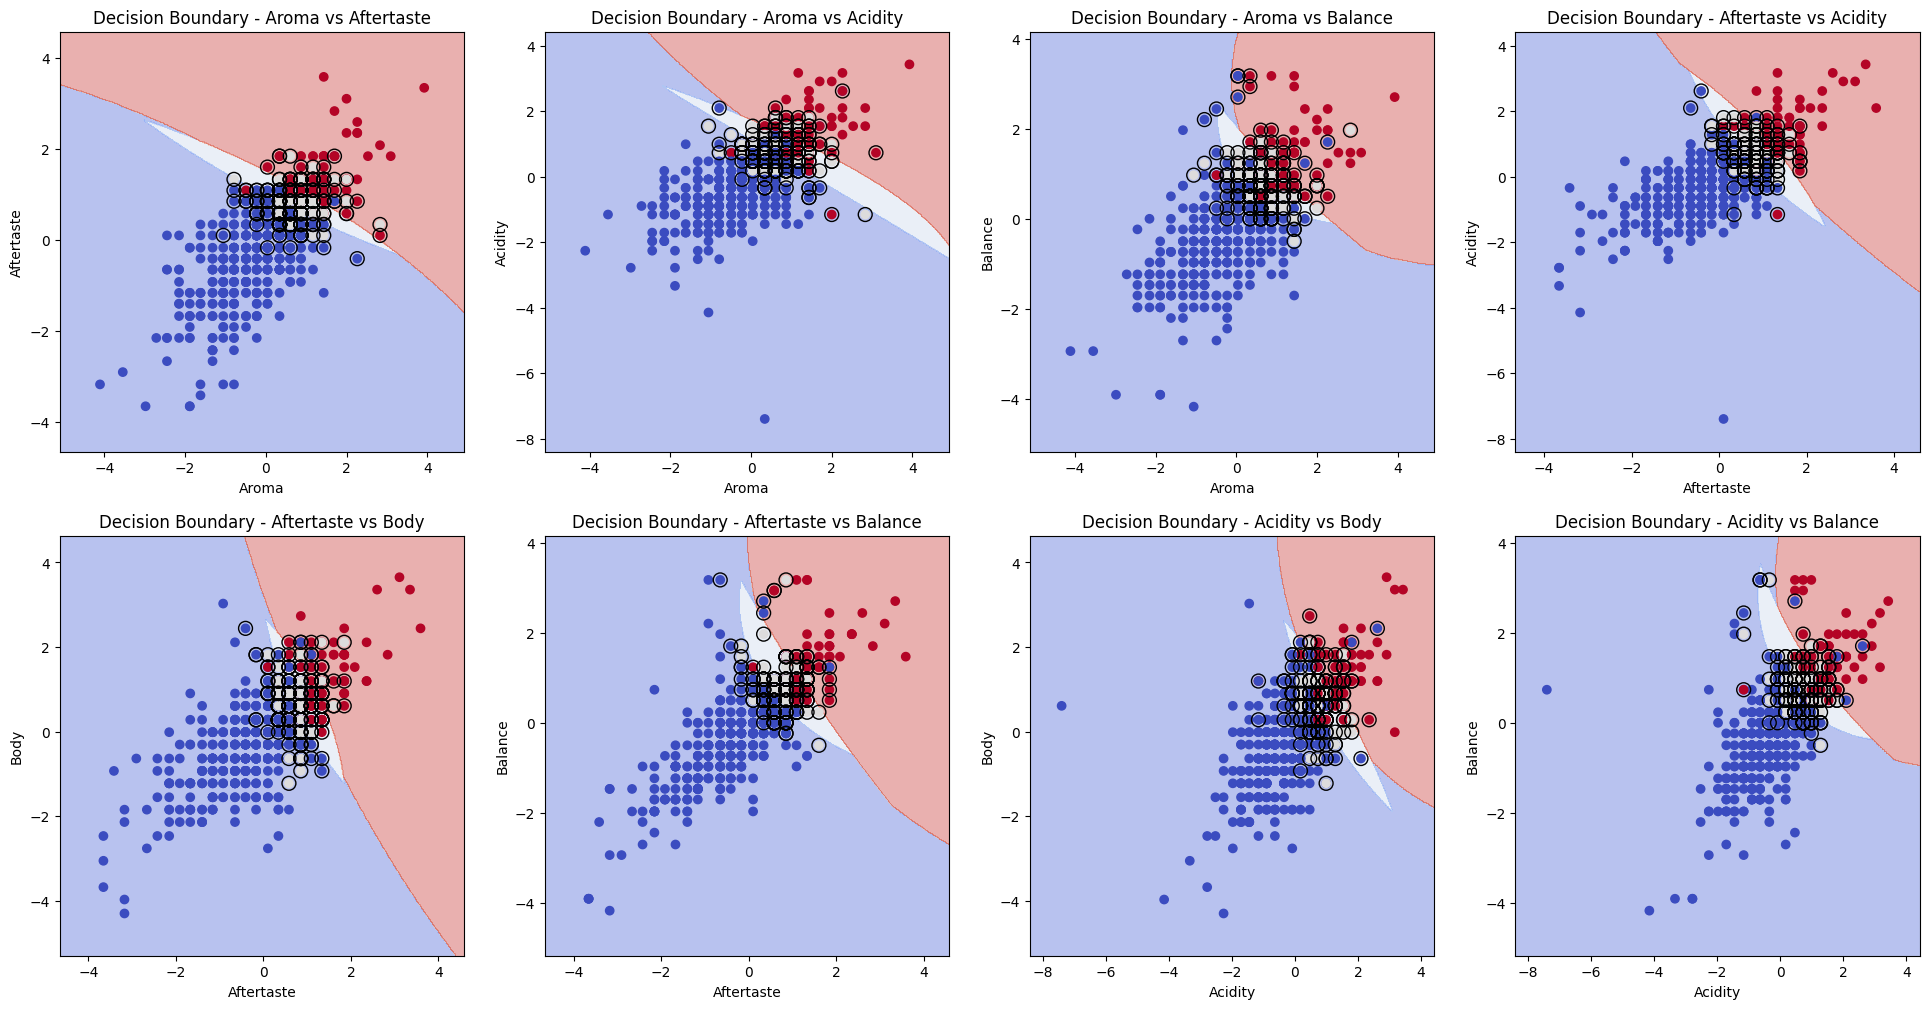
</details>


c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


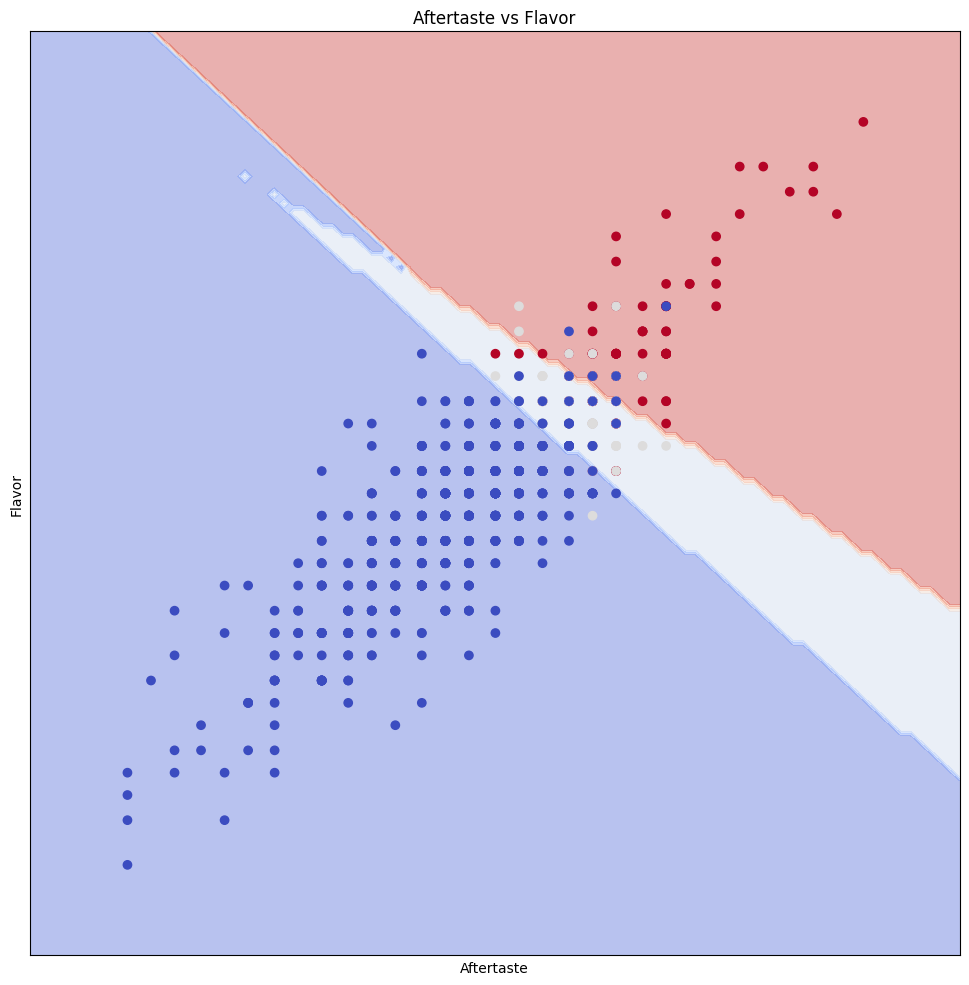

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


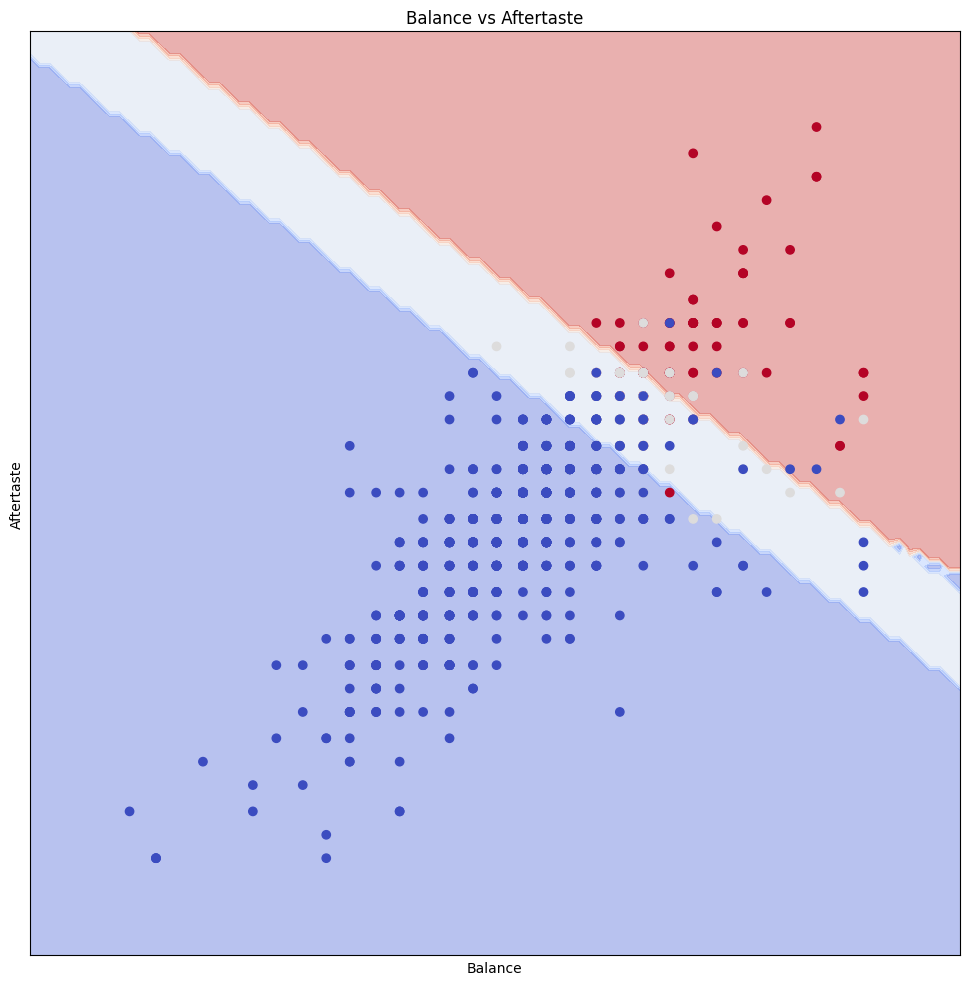

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


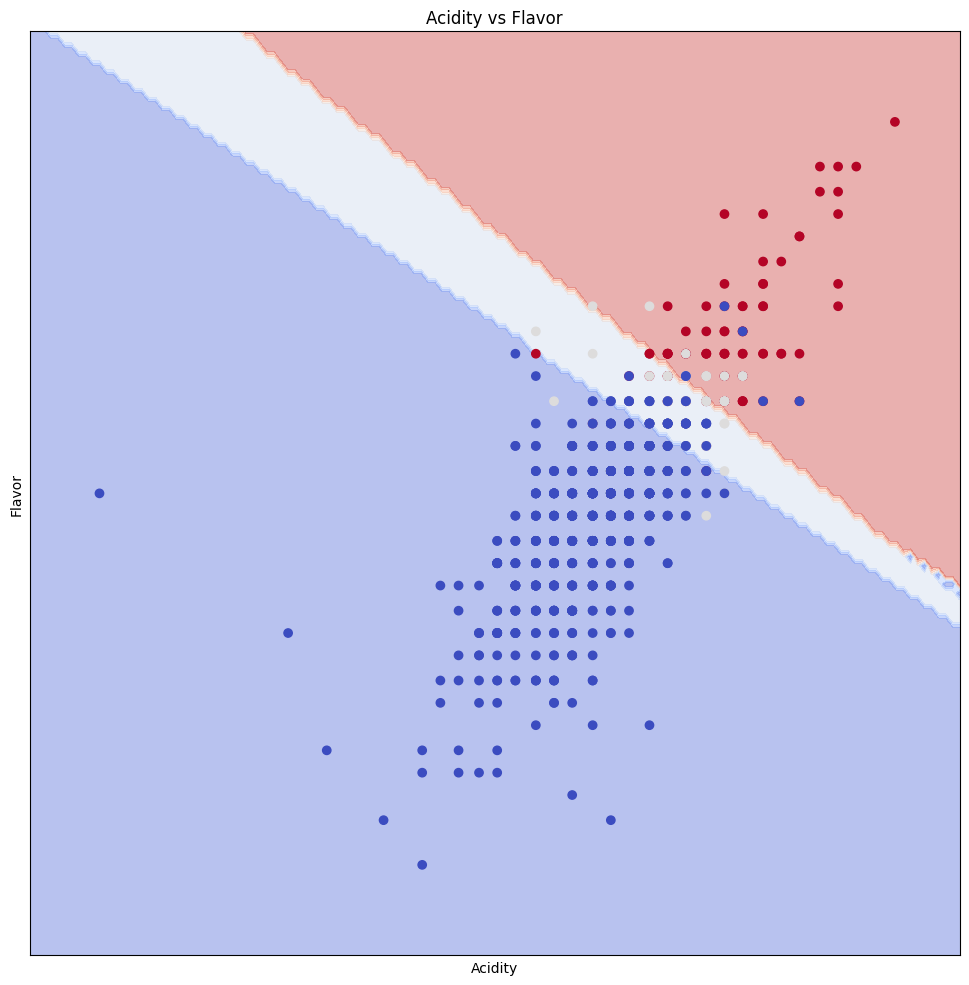

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


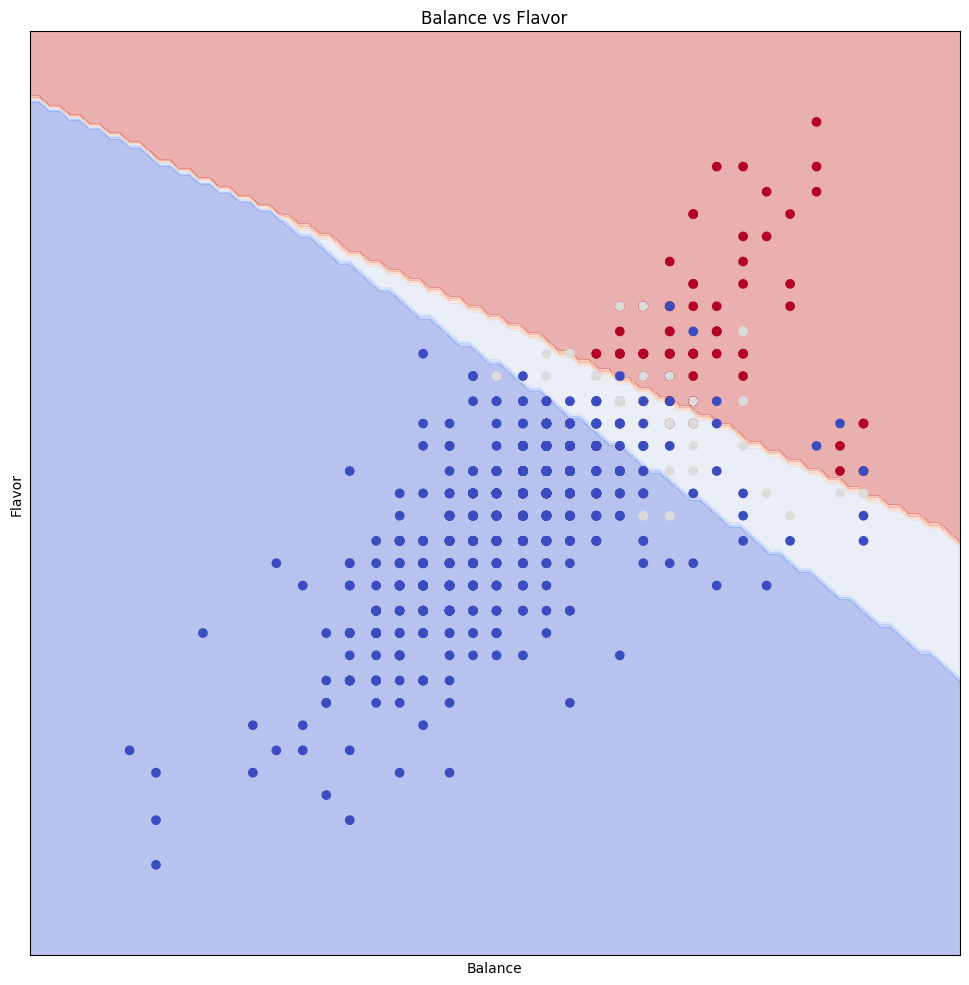

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


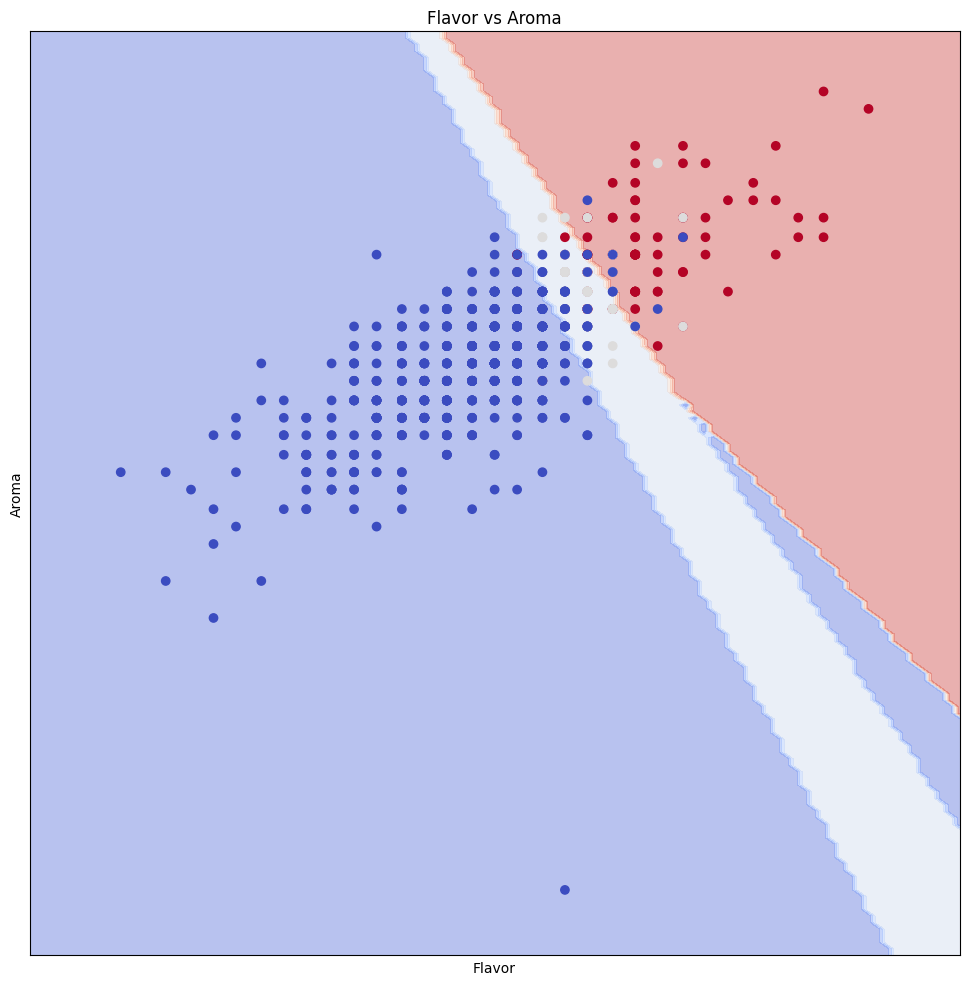

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


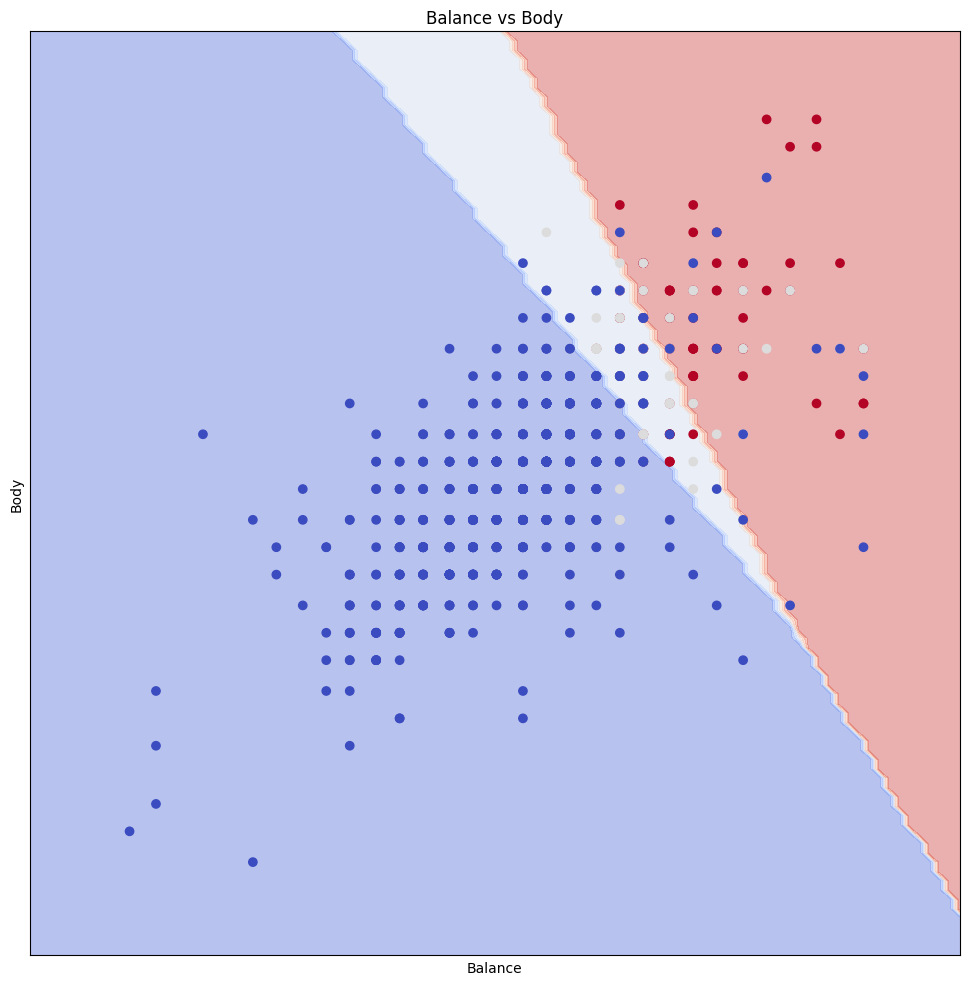

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


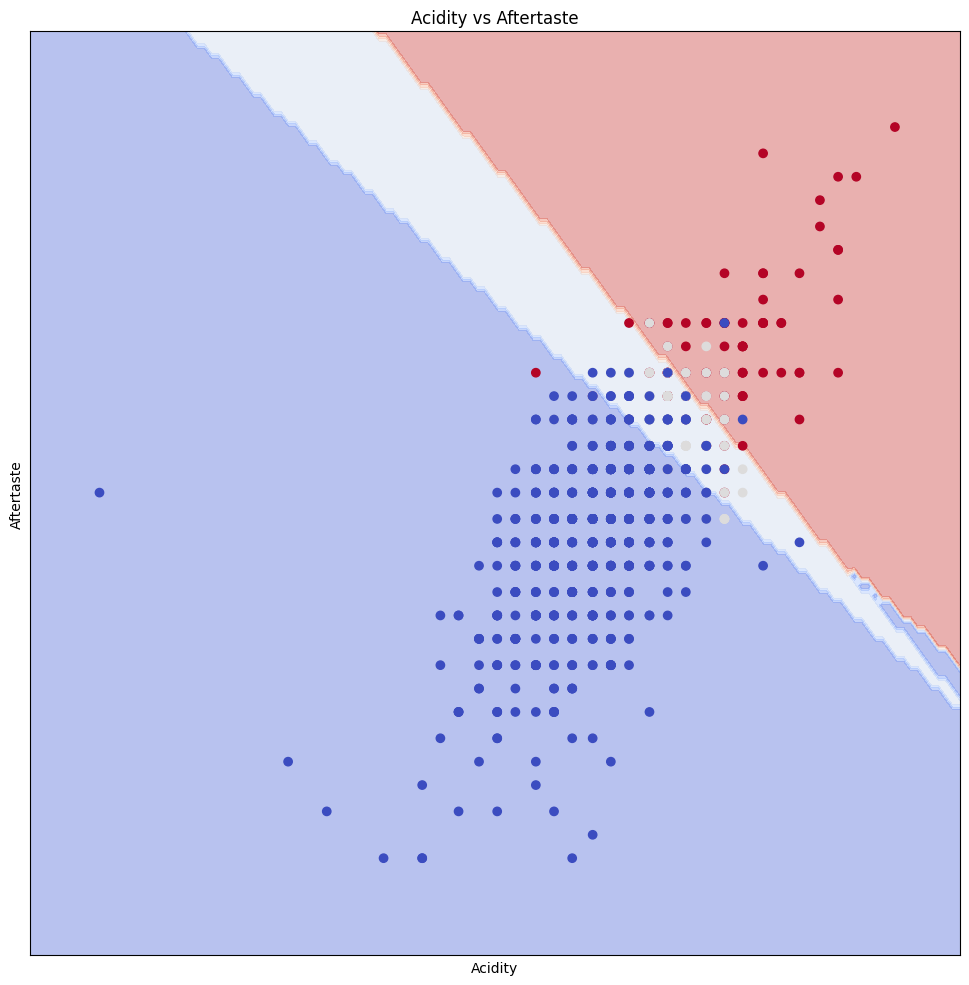

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


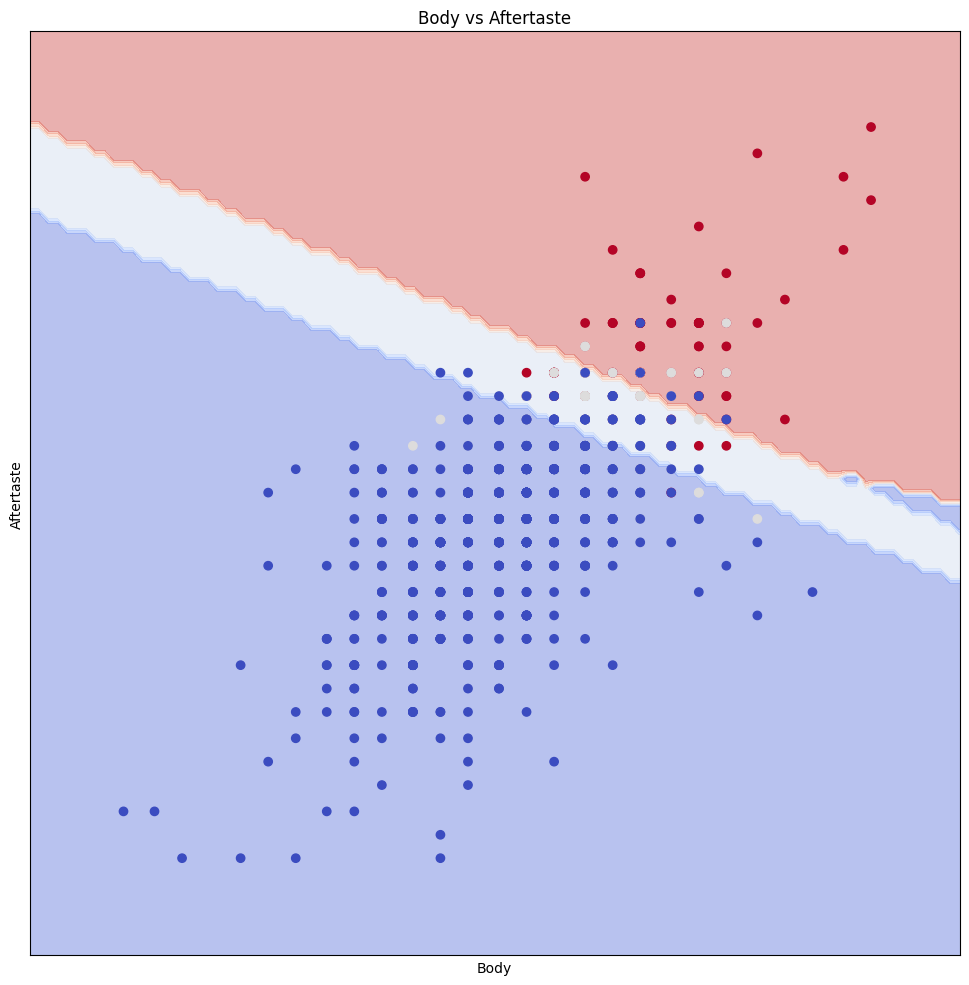

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


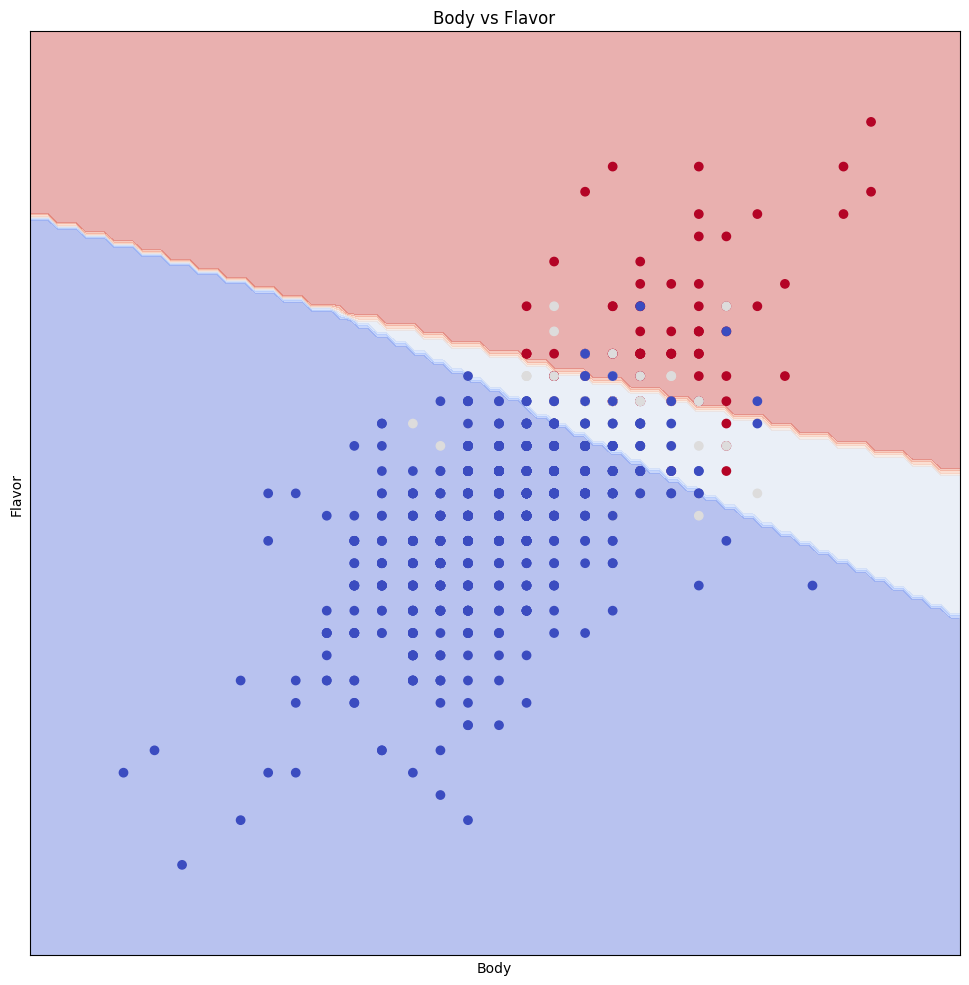

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


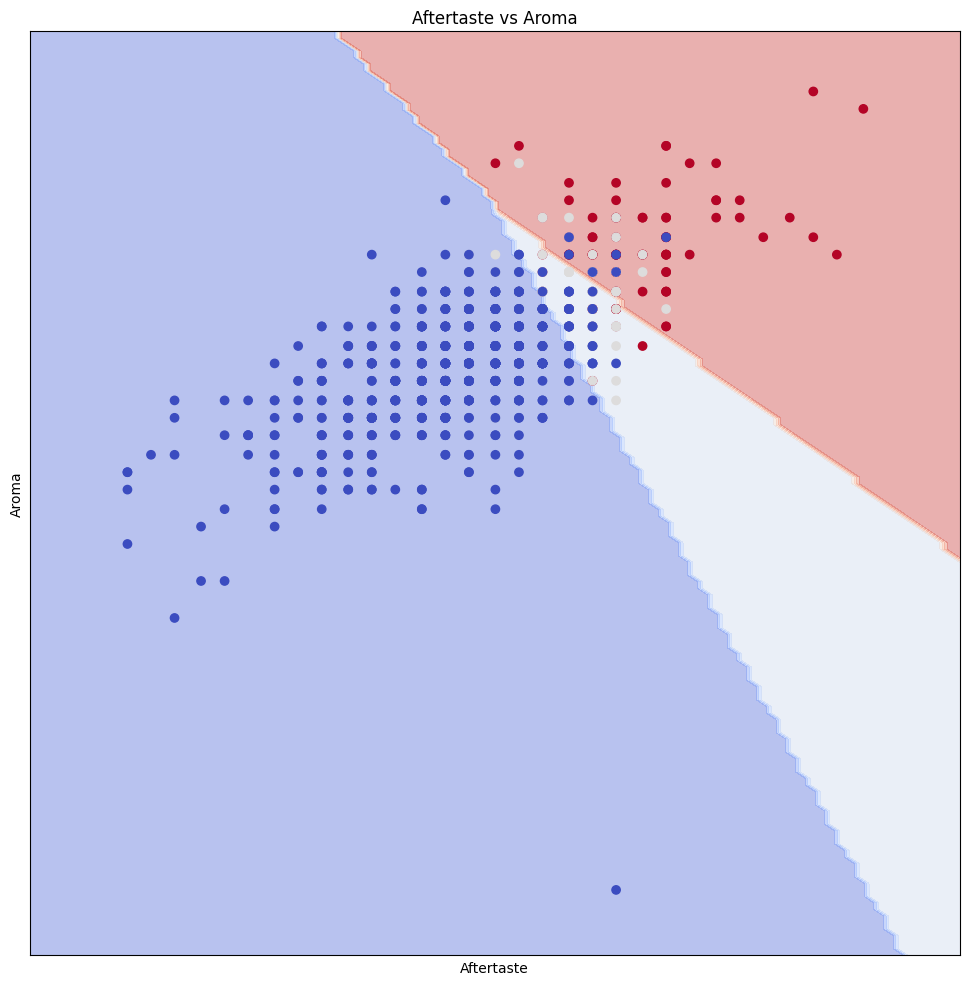

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


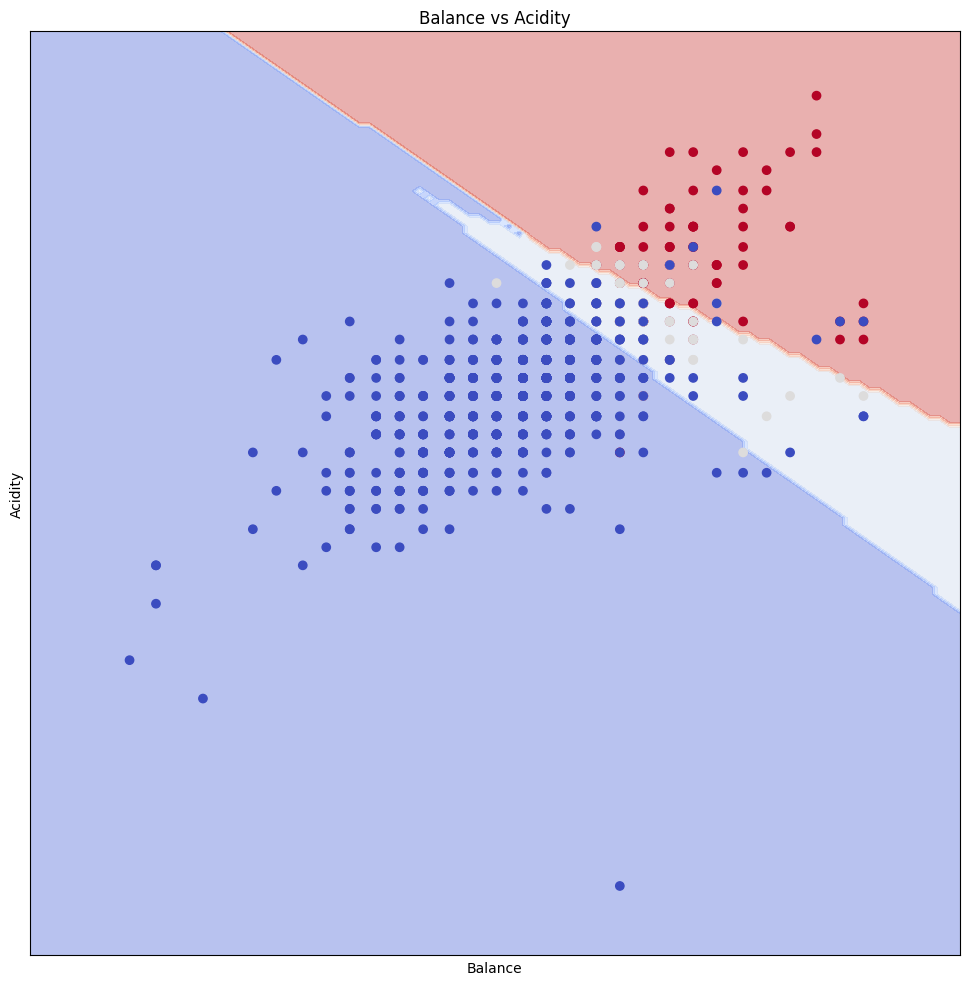

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


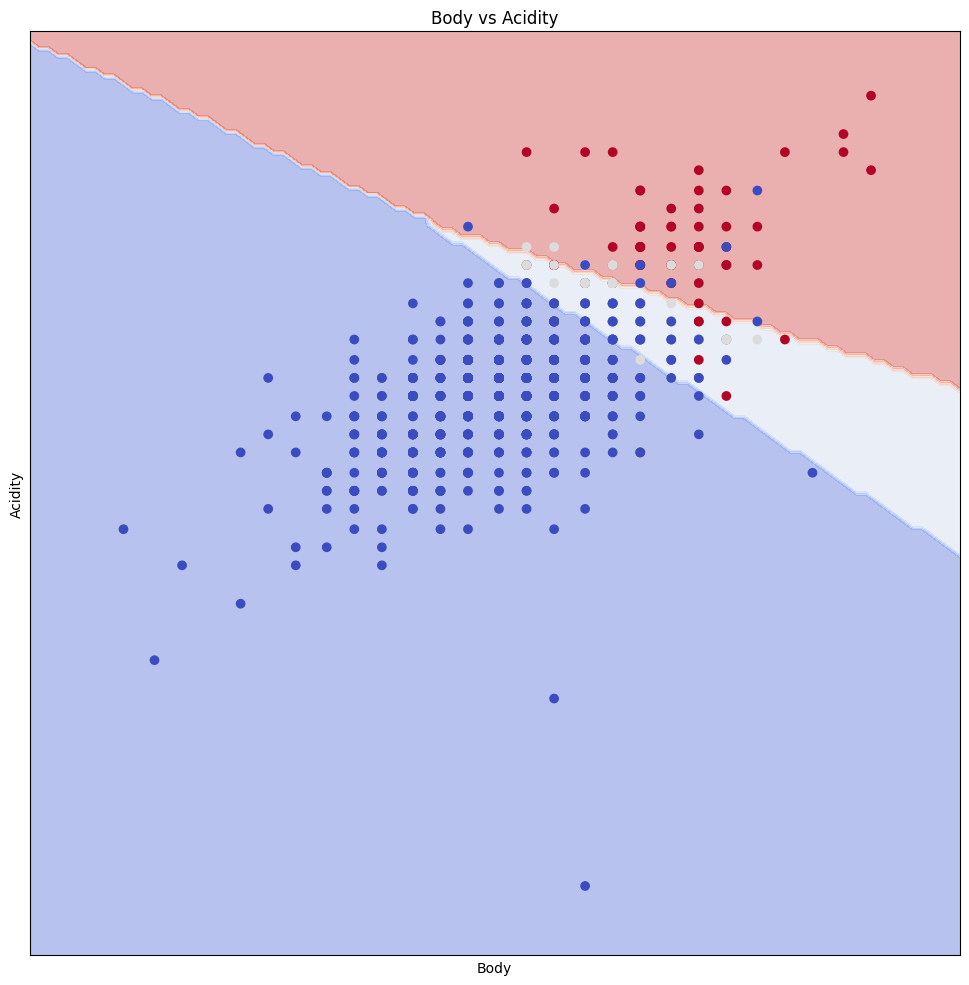

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


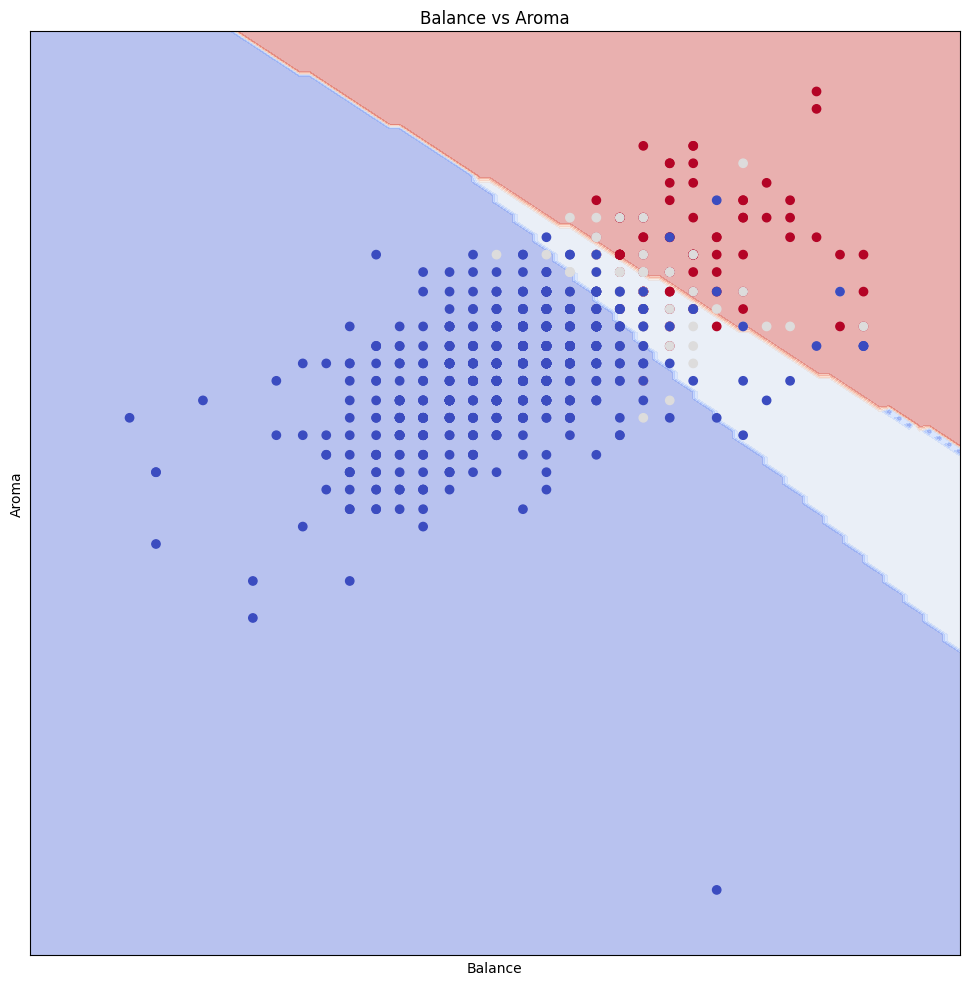

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


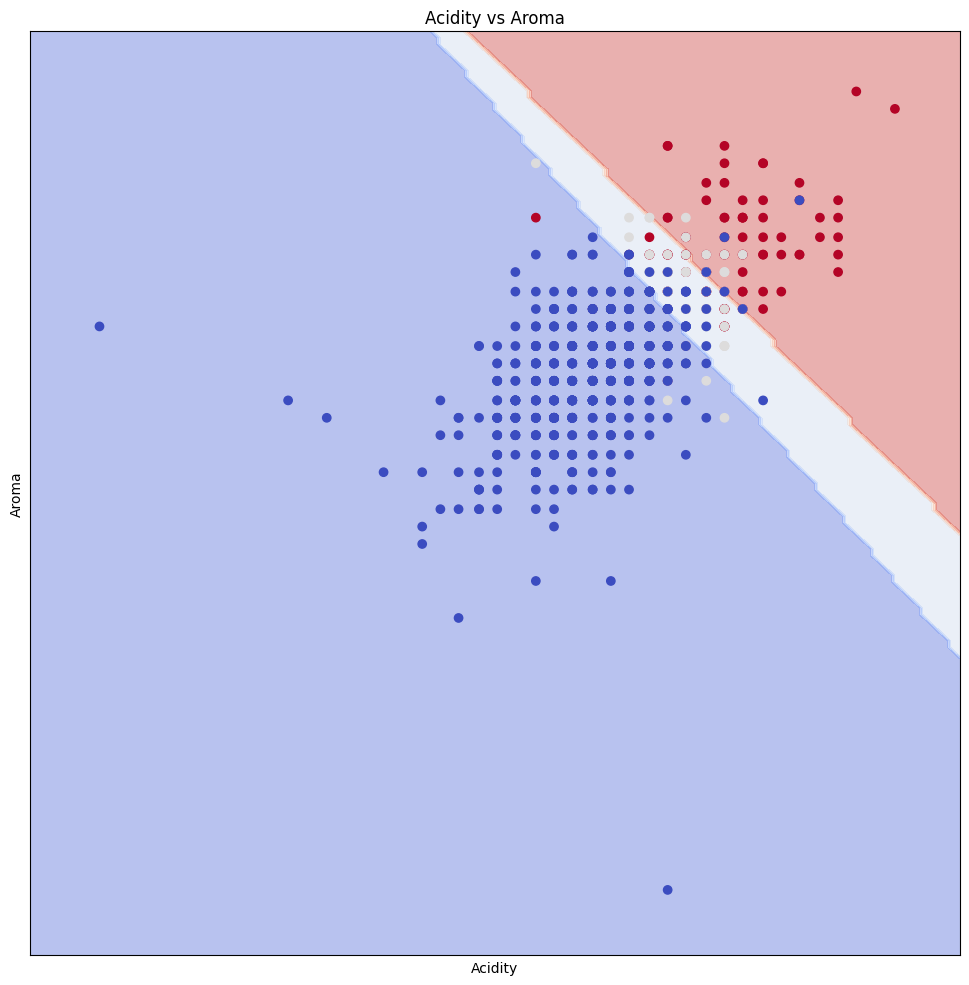

c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Kolawat\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


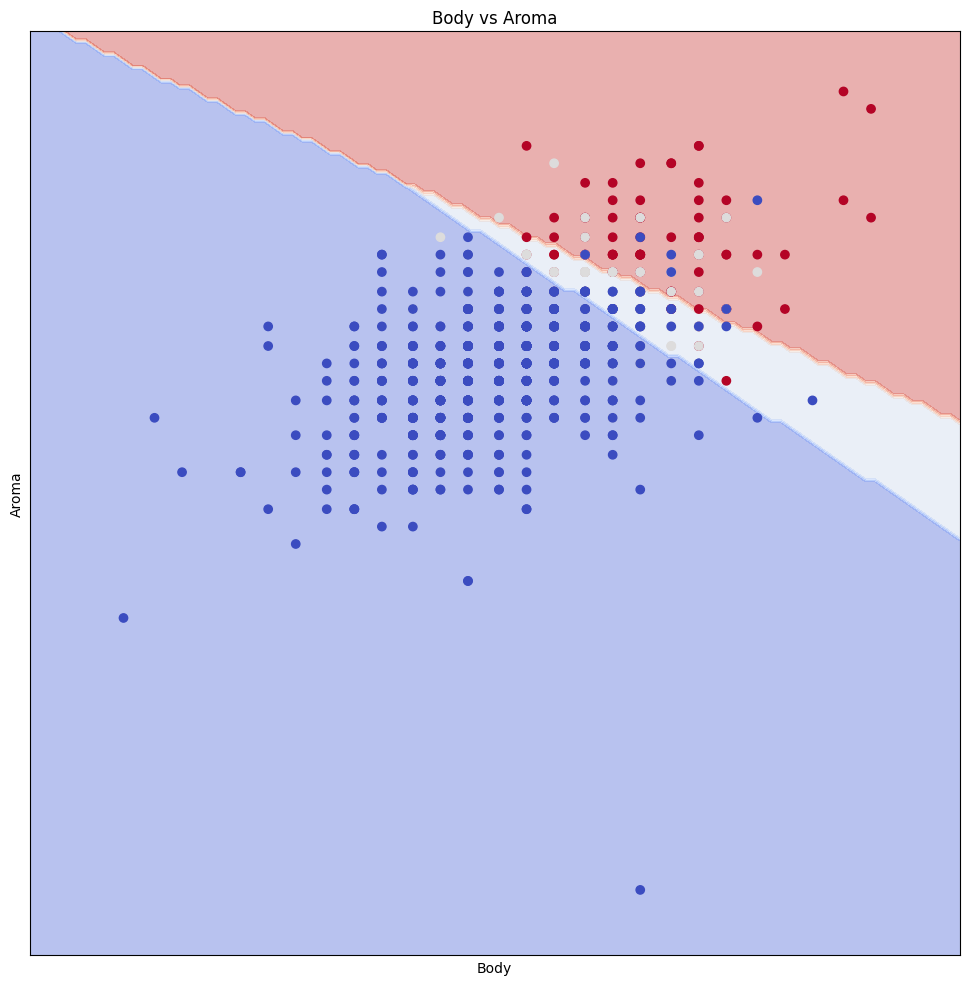

In [63]:
### START CODE HERE ###
for pair in pair_title:
    x_min, x_max = X[pair[0]].min() - 1, X[pair[0]].max() + 1
    y_min, y_max = X[pair[1]].min() - 1, X[pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    svc_model = SVC(
        kernel=best_params['kernel'],
        C=best_params['C'],
        degree=best_params['degree'],
        gamma=best_params['gamma'],
    )
    svc_model.fit(X_train[[pair[0], pair[1]]], Y_train)

    plt.figure(figsize=(12, 12))
    plt.subplot(1, 1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = svc_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[pair[0]], X[pair[1]],
                c=Y['Bean_grade'], cmap=plt.cm.coolwarm)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f'{pair[0]} vs {pair[1]}')
    plt.show()

### START CODE HERE ###

### Question

1. The dropped feature columns with corr > 0.8 are correlated to which columns?
2. Compare the top 3 best model parameters from gridsearchCV() and randomizedsearchcv(), are they different? Explain.
3. Choose a combination of model parameters that yield the highest standard deviation in cross-validation scores. Enumerate the scores for each cross-validation iteration and provide an explanation for the potential reasons behind the observed variations.
4. Show correlation values between Y output and each X input and how the top 2 highest and 2 lowest correlation of the pair Y and each X related to the decision boundary of 3 class output?


1. Aftertaste', 'Flavor
2. Grid Search
   1. C=10, kernel=linear; score=0.955
   2. C=0.01, degree=3, kernel=poly; score=0.909
   3. C=0.01, degree=2, kernel=poly; score=0.898
3. Randomized Search
   1. C=7.5024999999999995, kernel=linear; score=0.955
   2. C=10.0, kernel=linear; score=0.955
   3. C=5.005, gamma=0.2575, kernel=rbf; score=0.920
4.                                              
   lowest 2                                     correlation
   Moisture              Balance                -0.217
   Body                  Moisture               -0.201

   highest 2                                    correlation
   Balance               Aftertaste              0.765
   Aftertaste            Flavor                  0.848
